In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd

import random
import datetime

In [2]:
df = pd.read_csv("forbes_2022_billionaires.csv")

In [3]:
df.head()

,rank,personName,age,finalWorth,year,month,category,source,country,state,...,organization,selfMade,gender,birthDate,title,philanthropyScore,residenceMsa,numberOfSiblings,bio,about
0,1,Elon Musk,50.0,219000.0,2022,4,Automotive,"Tesla, SpaceX",United States,Texas,...,Tesla,True,M,1971-06-28,CEO,1.0,NaN,NaN,Elon Musk is working to revolutionize transpor...,Musk was accepted to a graduate program at Sta...
1,2,Jeff Bezos,58.0,171000.0,2022,4,Technology,Amazon,United States,Washington,...,Amazon,True,M,1964-01-12,Entrepreneur,1.0,"Seattle-Tacoma-Bellevue, WA",NaN,Jeff Bezos founded e-commerce giant Amazon in ...,"Growing up, Jeff Bezos worked summers on his g..."
2,3,Bernard Arnault & family,73.0,158000.0,2022,4,Fashion & Retail,LVMH,France,NaN,...,LVMH Moët Hennessy Louis Vuitton,False,M,1949-03-05,Chairman and CEO,NaN,NaN,NaN,Bernard Arnault oversees the LVMH empire of so...,"Arnault apparently wooed his wife, Helene Merc..."
3,4,Bill Gates,66.0,129000.0,2022,4,Technology,Microsoft,United States,Washington,...,Bill & Melinda Gates Foundation,True,M,1955-10-28,Cofounder,4.0,"Seattle-Tacoma-Bellevue, WA",NaN,Bill Gates turned his fortune from software fi...,"When Gates was a kid, he spent so much time re..."
4,5,Warren Buffett,91.0,118000.0,2022,4,Finance & Investments,Berkshire Hathaway,United States,Nebraska,...,Berkshire Hathaway,True,M,1930-08-30,CEO,5.0,"Omaha, NE",NaN,"Known as the ""Oracle of Omaha,"" Warren Buffett...","Buffett still lives in the same Omaha, Nebrask..."


In [4]:
df.tail()

,rank,personName,age,finalWorth,year,month,category,source,country,state,...,organization,selfMade,gender,birthDate,title,philanthropyScore,residenceMsa,numberOfSiblings,bio,about
2663,2578,Zhang Yuqiang,66.0,1000.0,2022,4,Manufacturing,Fiberglass,China,NaN,...,NaN,True,M,1955-09-01,NaN,NaN,NaN,NaN,"Zhang Yuqiang chairs Zhenshi Holding Group, a ...",NaN
2664,2578,Zhou Ruxin,59.0,1000.0,2022,4,Technology,Navigation,China,NaN,...,NaN,True,M,1963-03-01,NaN,NaN,NaN,NaN,"Zhou Ruxin chairs Beijing BDStar Navigation, a...",NaN
2665,2578,Wen Zhou & family,57.0,1000.0,2022,4,Manufacturing,chemicals,China,NaN,...,NaN,True,M,1965-03-06,NaN,NaN,NaN,NaN,"Zhou Wen chairs Shanghai Pret Composites, a su...",NaN
2666,2578,Zhou Yifeng & family,43.0,1000.0,2022,4,Energy,liquefied petroleum gas,China,NaN,...,NaN,True,F,1978-07-11,NaN,NaN,NaN,NaN,Zhou Yifeng chairs Shenzhen-listed Oriental En...,NaN
2667,2578,Zhuang Kuilong & family,59.0,1000.0,2022,4,Manufacturing,polyester,China,NaN,...,NaN,True,M,1962-06-15,NaN,NaN,NaN,NaN,"Zhuang Kuilong chairs Xinfengming Group, a man...",NaN


In [5]:
df.shape

(2668, 22)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2668 entries, 0 to 2667
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   rank                  2668 non-null   int64  
 1   personName            2668 non-null   object 
 2   age                   2582 non-null   float64
 3   finalWorth            2668 non-null   float64
 4   year                  2668 non-null   int64  
 5   month                 2668 non-null   int64  
 6   category              2668 non-null   object 
 7   source                2668 non-null   object 
 8   country               2655 non-null   object 
 9   state                 748 non-null    object 
 10  city                  2624 non-null   object 
 11  countryOfCitizenship  2668 non-null   object 
 12  organization          352 non-null    object 
 13  selfMade              2668 non-null   bool   
 14  gender                2652 non-null   object 
 15  birthDate            

In [7]:
df.columns

Index(['rank', 'personName', 'age', 'finalWorth', 'year', 'month', 'category',
       'source', 'country', 'state', 'city', 'countryOfCitizenship',
       'organization', 'selfMade', 'gender', 'birthDate', 'title',
       'philanthropyScore', 'residenceMsa', 'numberOfSiblings', 'bio',
       'about'],
      dtype='object')

In [8]:
df = df.loc[:,["rank","personName","age","finalWorth","category","country","gender"]]
df.head()

,rank,personName,age,finalWorth,category,country,gender
0,1,Elon Musk,50.0,219000.0,Automotive,United States,M
1,2,Jeff Bezos,58.0,171000.0,Technology,United States,M
2,3,Bernard Arnault & family,73.0,158000.0,Fashion & Retail,France,M
3,4,Bill Gates,66.0,129000.0,Technology,United States,M
4,5,Warren Buffett,91.0,118000.0,Finance & Investments,United States,M


In [9]:
df = df.set_index("rank")

In [10]:
df.head()

,personName,age,finalWorth,category,country,gender
rank,,,,,,
1,Elon Musk,50.0,219000.0,Automotive,United States,M
2,Jeff Bezos,58.0,171000.0,Technology,United States,M
3,Bernard Arnault & family,73.0,158000.0,Fashion & Retail,France,M
4,Bill Gates,66.0,129000.0,Technology,United States,M
5,Warren Buffett,91.0,118000.0,Finance & Investments,United States,M


In [11]:
df.dtypes

personName     object
age           float64
finalWorth    float64
category       object
country        object
gender         object
dtype: object

In [12]:
df.isnull().sum()

personName     0
age           86
finalWorth     0
category       0
country       13
gender        16
dtype: int64

In [13]:
df.dropna(inplace = True)

In [14]:
df.shape

(2568, 6)

In [15]:
df["category"].value_counts()

Finance & Investments         381
Technology                    332
Manufacturing                 319
Fashion & Retail              238
Healthcare                    209
Food & Beverage               193
Real Estate                   187
Diversified                   174
Media & Entertainment          95
Energy                         93
Automotive                     66
Metals & Mining                65
Service                        52
Construction & Engineering     45
Telecom                        37
Logistics                      32
Sports                         27
Gambling & Casinos             23
Name: category, dtype: int64

In [16]:
df["gender"].value_counts()

M    2282
F     286
Name: gender, dtype: int64

In [17]:
df["gender"].value_counts(normalize = True)

M    0.888629
F    0.111371
Name: gender, dtype: float64

In [18]:
df[df["country"]== "Turkey"].gender.value_counts(normalize = True)

M    0.826087
F    0.173913
Name: gender, dtype: float64

In [19]:
df["country"].unique()

array(['United States', 'France', 'India', 'Mexico', 'China', 'Singapore',
       'Spain', 'Canada', 'Germany', 'Switzerland', 'Belgium',
       'Hong Kong', 'United Kingdom', 'Australia', 'Austria', 'Italy',
       'Japan', 'Bahamas', 'Indonesia', 'Chile', 'Russia', 'Sweden',
       'Czechia', 'Monaco', 'United Arab Emirates', 'Nigeria', 'Denmark',
       'Thailand', 'Malaysia', 'Brazil', 'Colombia', 'New Zealand',
       'South Korea', 'South Africa', 'Philippines', 'Egypt', 'Taiwan',
       'Israel', 'Vietnam', 'Poland', 'Norway', 'Cayman Islands',
       'Netherlands', 'Eswatini (Swaziland)', 'Peru', 'Algeria',
       'Kazakhstan', 'Georgia', 'Portugal', 'British Virgin Islands',
       'Turkey', 'Finland', 'Ukraine', 'Ireland', 'Bermuda', 'Lebanon',
       'Argentina', 'Cambodia', 'Oman', 'Guernsey', 'Liechtenstein',
       'Turks and Caicos Islands', 'Qatar', 'Morocco', 'Uruguay',
       'Slovakia', 'Romania', 'Nepal', 'Tanzania', 'Bahrain', 'Greece',
       'Hungary', 'Andorra']

In [20]:
df[df["country"]== "United States"].gender.value_counts(normalize = True)

M    0.881402
F    0.118598
Name: gender, dtype: float64

In [21]:
df[df["country"]== "China"].gender.value_counts(normalize = True)

M    0.913919
F    0.086081
Name: gender, dtype: float64

In [22]:
df[df["country"]== "Egypt"].gender.value_counts(normalize = True)

M    1.0
Name: gender, dtype: float64

In [23]:
df[df["country"]== "Sweden"].gender.value_counts(normalize = True)

M    0.8125
F    0.1875
Name: gender, dtype: float64

In [24]:
df[df["country"]== "Canada"].gender.value_counts(normalize = True)

M    0.952381
F    0.047619
Name: gender, dtype: float64

In [25]:
df_gender = df.groupby(["gender"])

In [26]:
df_gender["age"].mean()

gender
F    62.937063
M    64.409290
Name: age, dtype: float64

In [27]:
df[df["category"]== "Finance & Investments"].gender.value_counts(normalize = True)

M    0.937008
F    0.062992
Name: gender, dtype: float64

In [28]:
df[df["category"]== "Technology"].gender.value_counts(normalize = True)

M    0.918675
F    0.081325
Name: gender, dtype: float64

In [29]:
df[df["category"]== "Healthcare"].gender.value_counts(normalize = True)

M    0.856459
F    0.143541
Name: gender, dtype: float64

In [30]:

sns.set_theme()
sns.set(rc = {"figure.figsize":(12,8), "figure.dpi":300})

In [31]:
import warnings
warnings.filterwarnings("ignore")

Text(0.5, 1.0, 'Average ages of men and women')

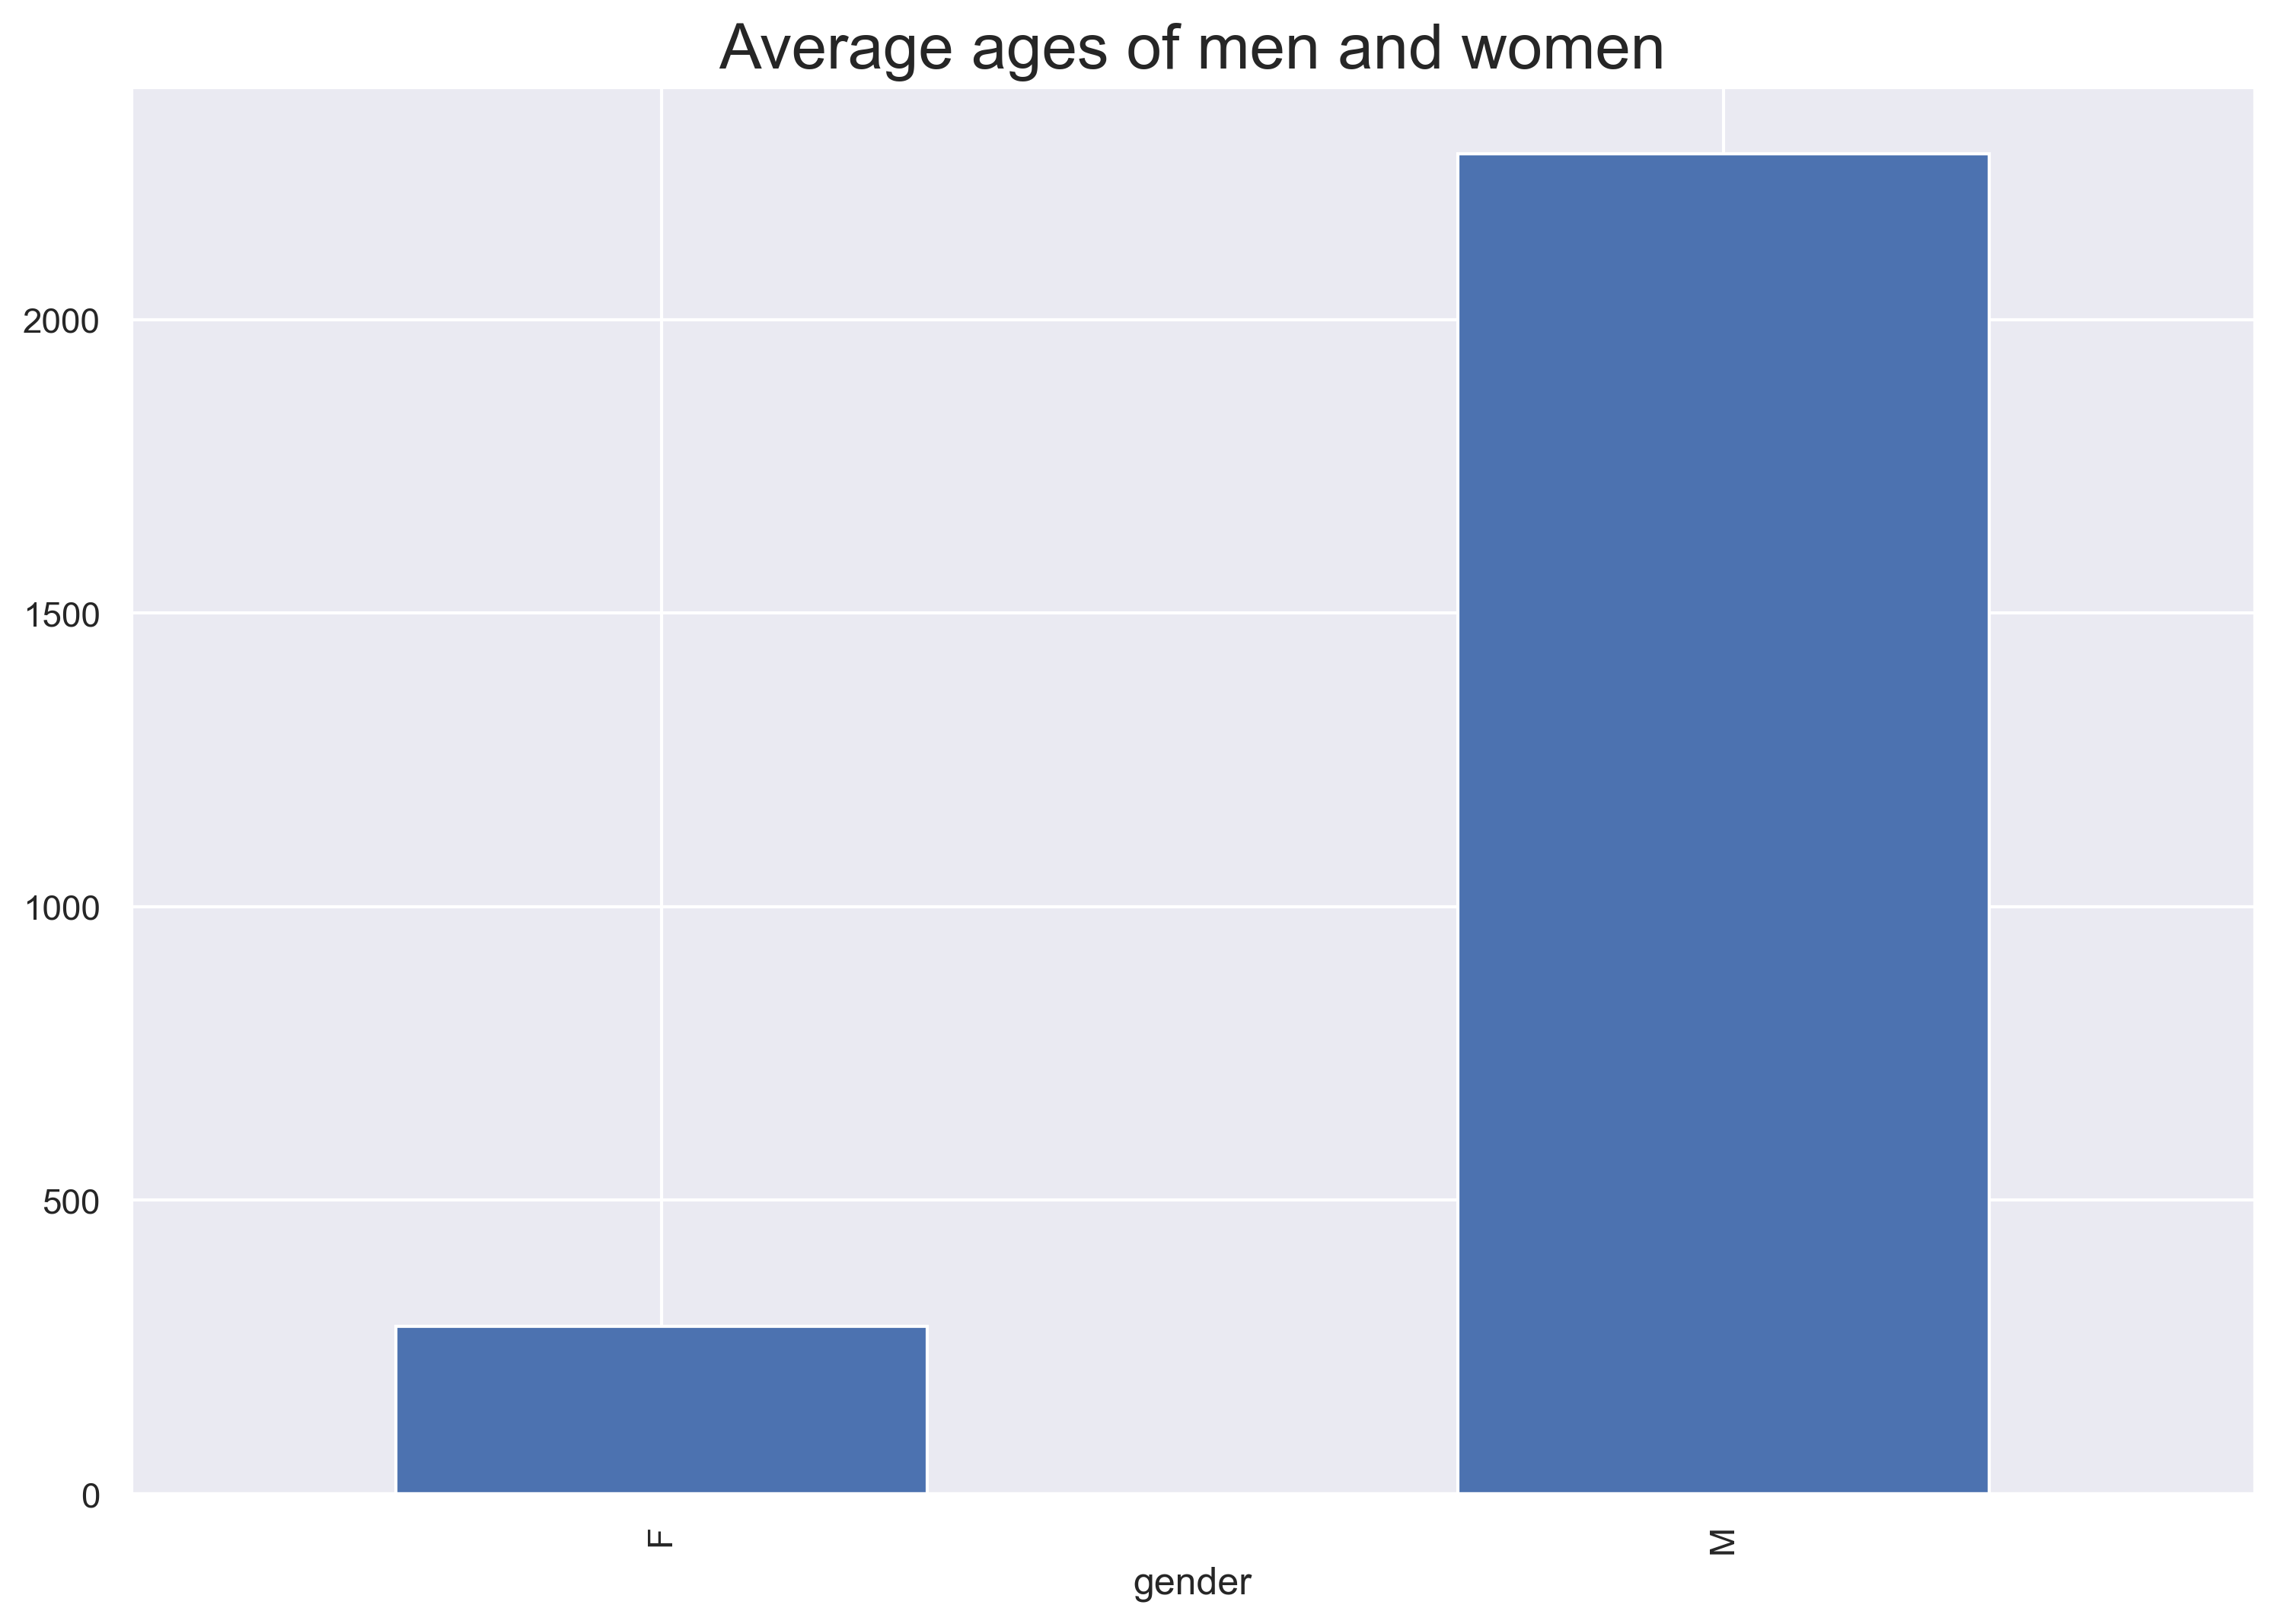

In [32]:
df_gender.size().plot(kind = "bar")
plt.title('Average ages of men and women', fontsize = 20)

Text(0.5, 1.0, 'Top 10 richest')

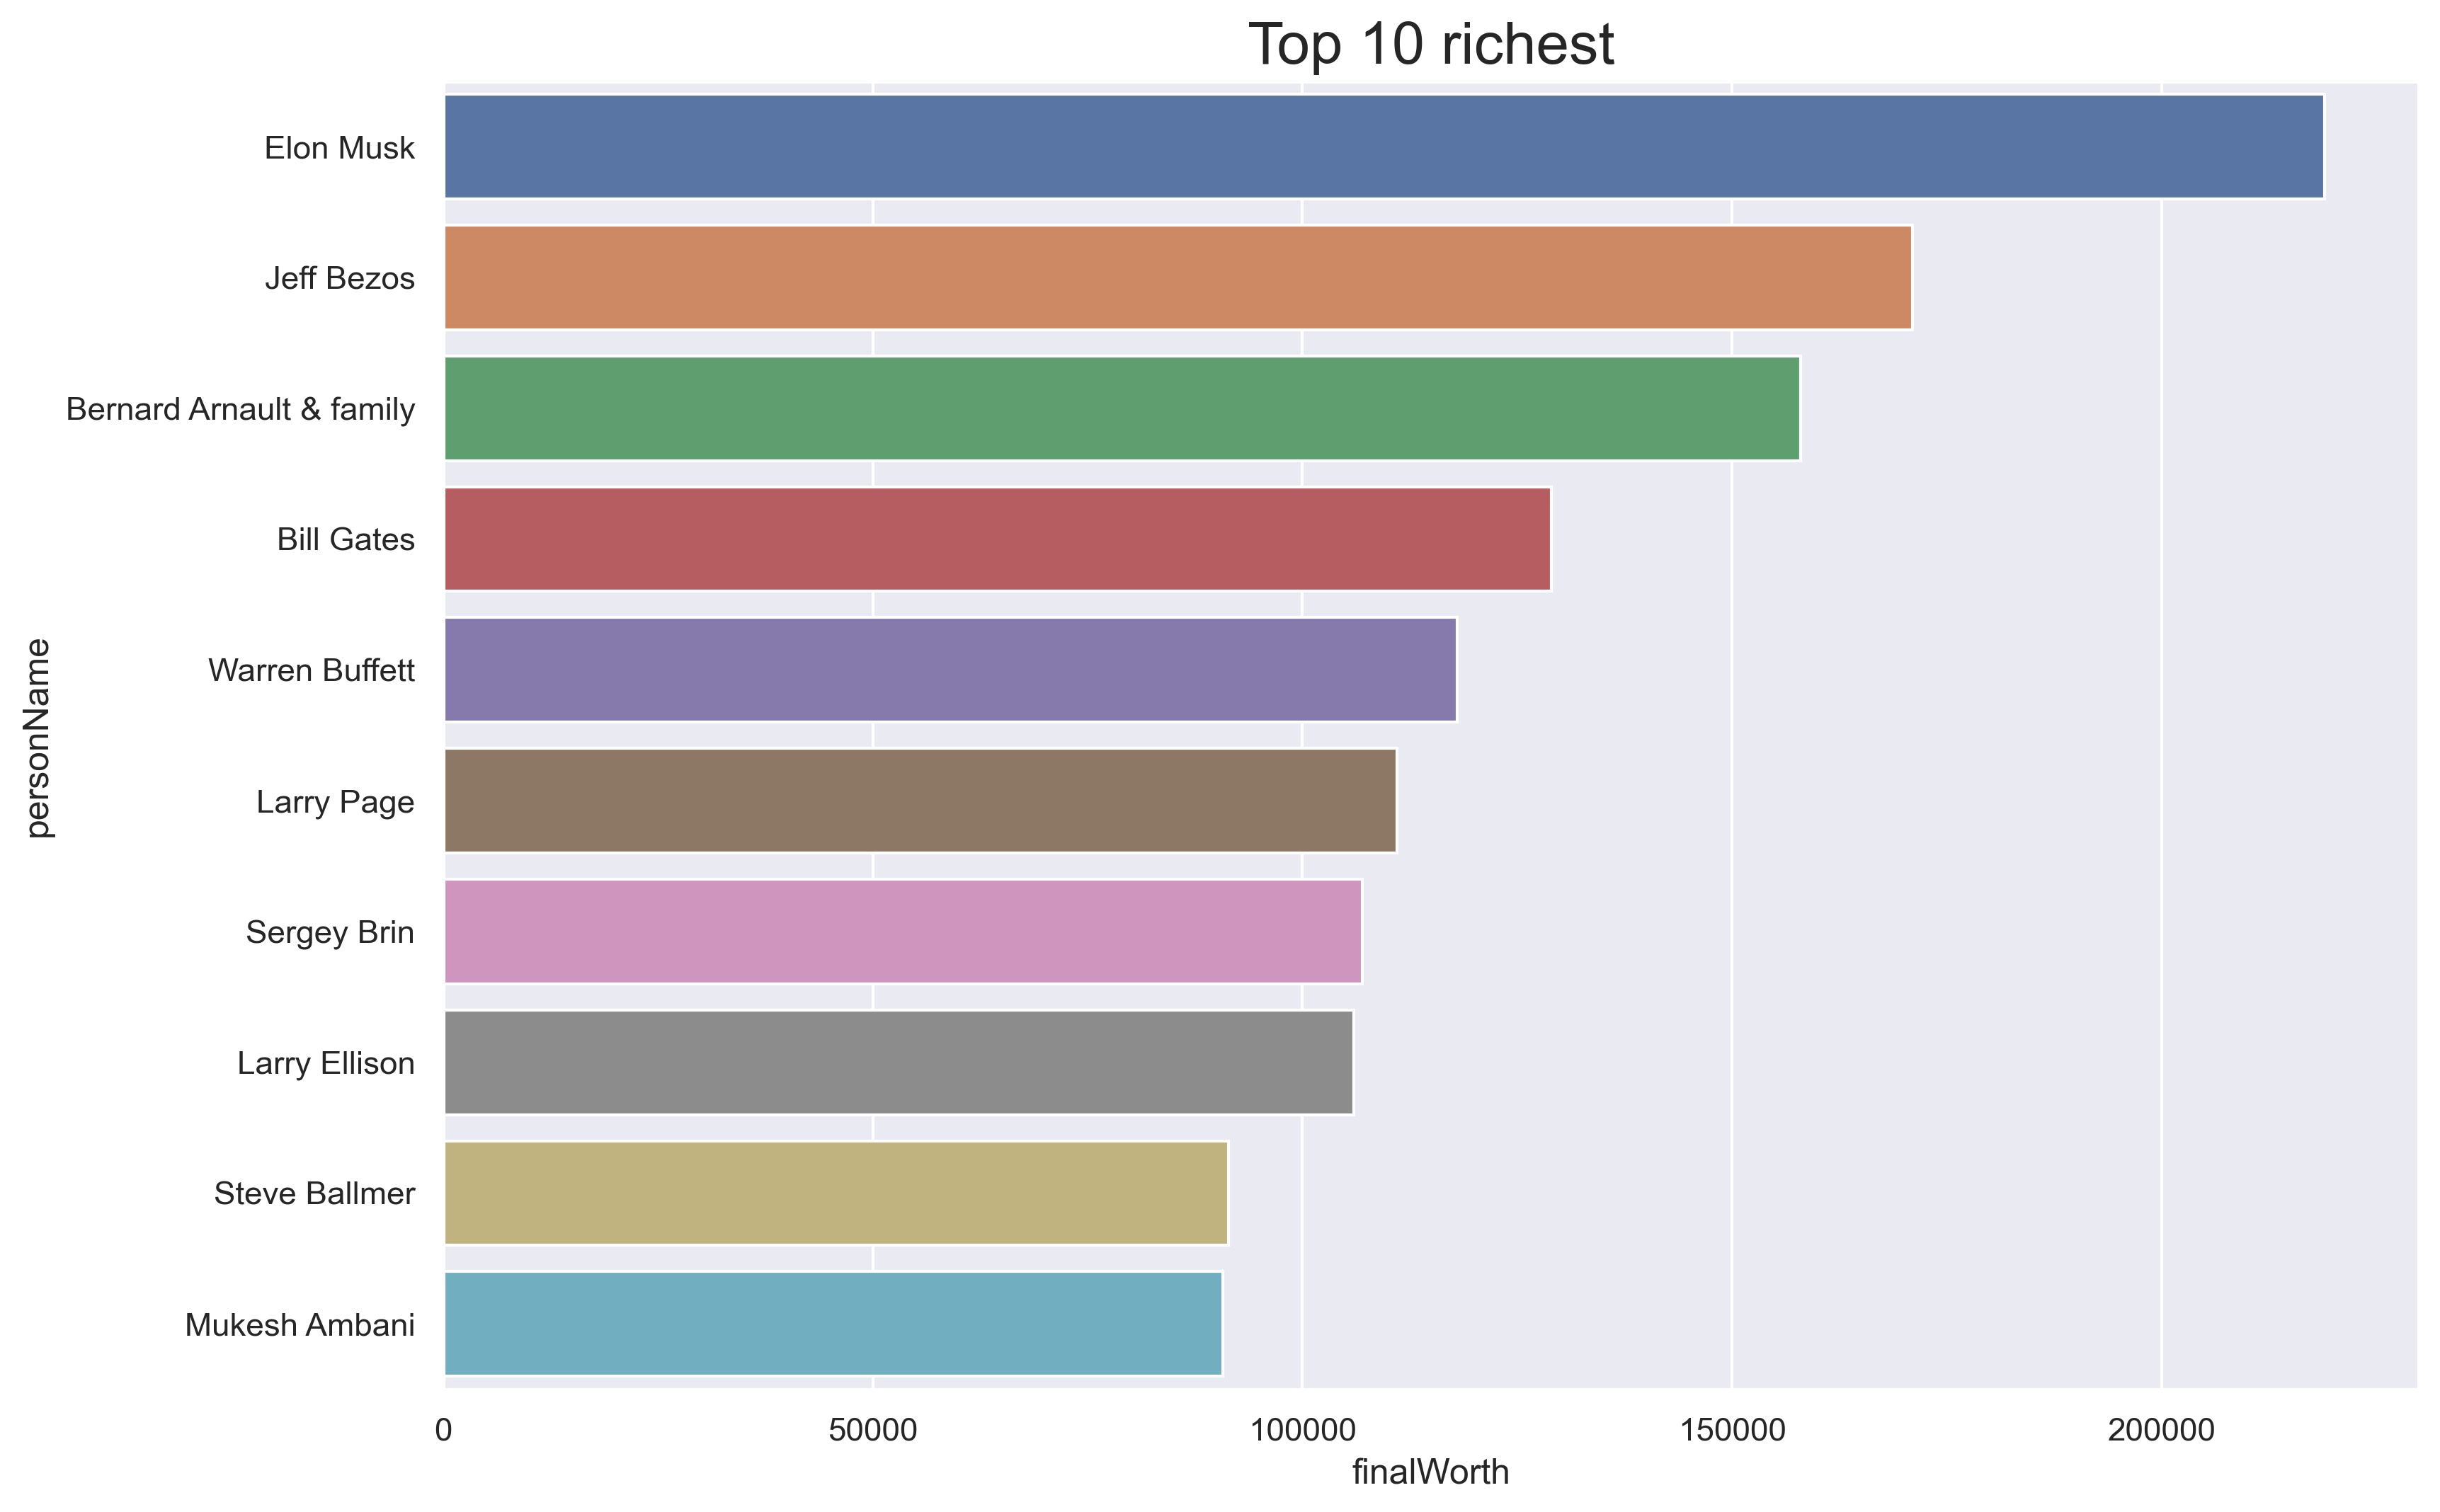

In [33]:
sns.barplot(y=df["personName"][:10], x = df["finalWorth"][:10])
plt.title('Top 10 richest', fontsize = 20)

Text(0.5, 1.0, 'Top 10 richest')

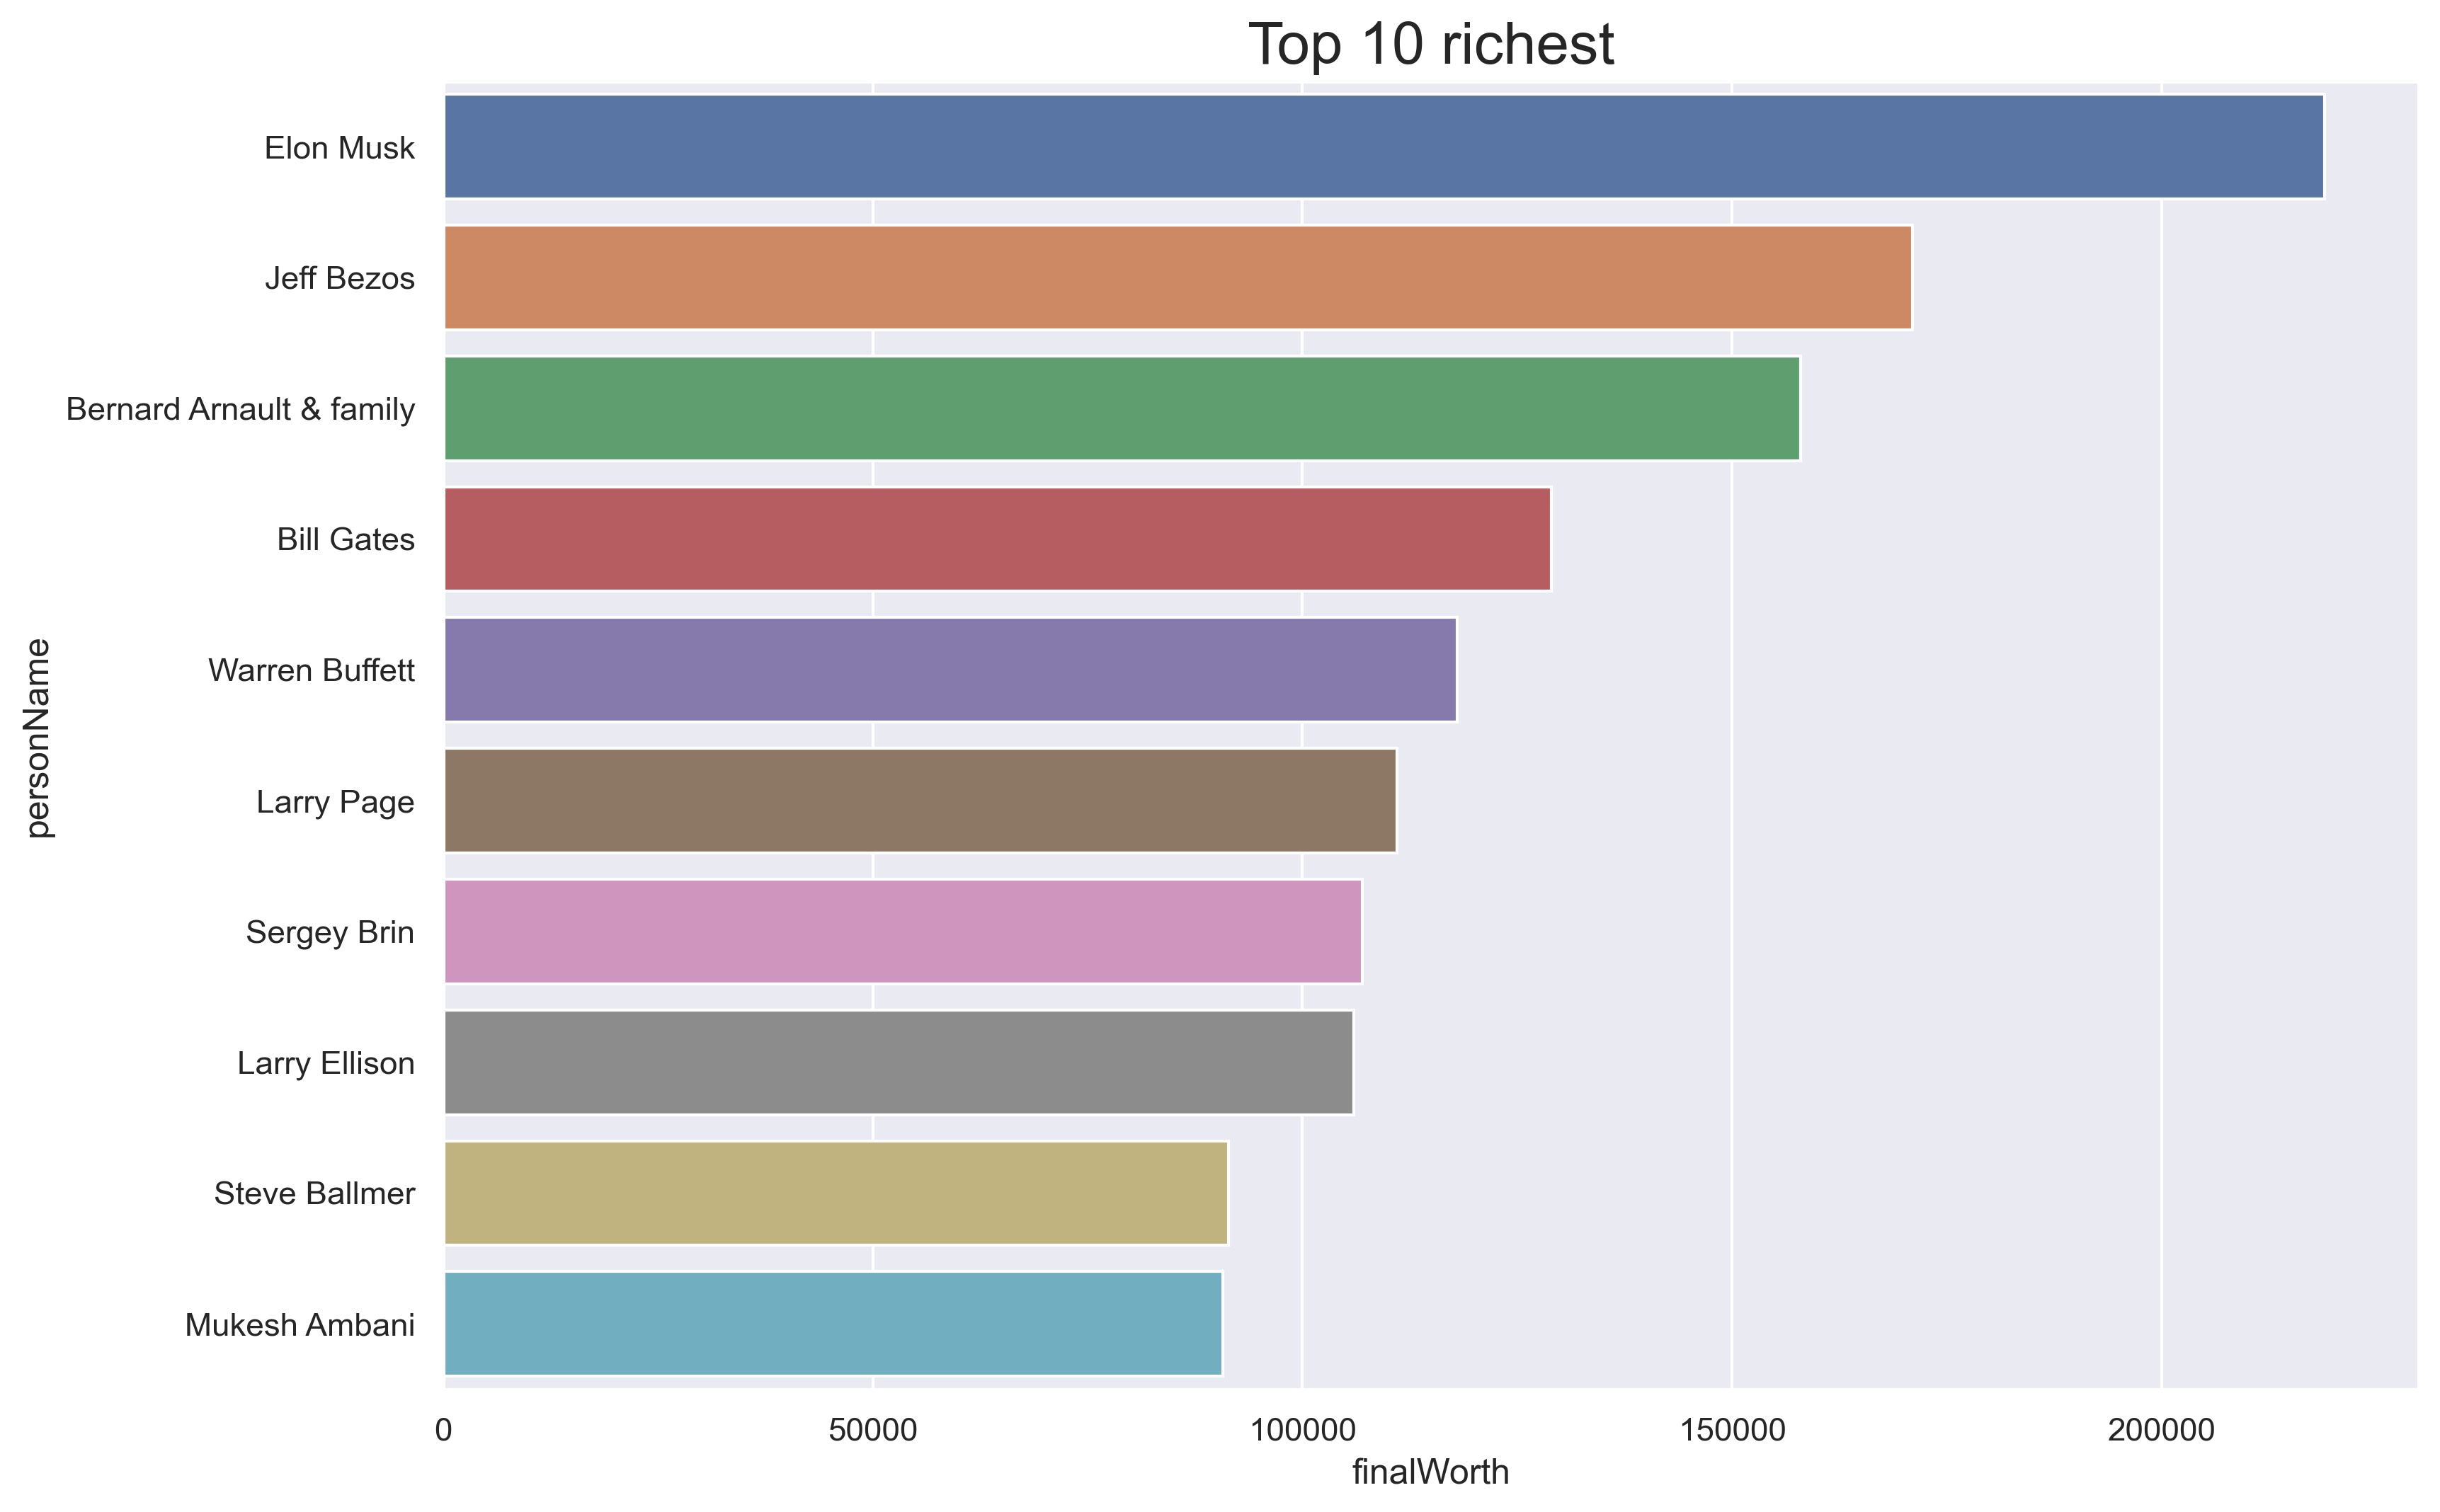

In [34]:
sns.barplot(y=df["personName"][:10], x = df["finalWorth"][:10])
plt.title('Top 10 richest', fontsize = 20)

In [35]:
df_category = df.groupby("category").size()
df_category.head()

category
Automotive                     66
Construction & Engineering     45
Diversified                   174
Energy                         93
Fashion & Retail              238
dtype: int64

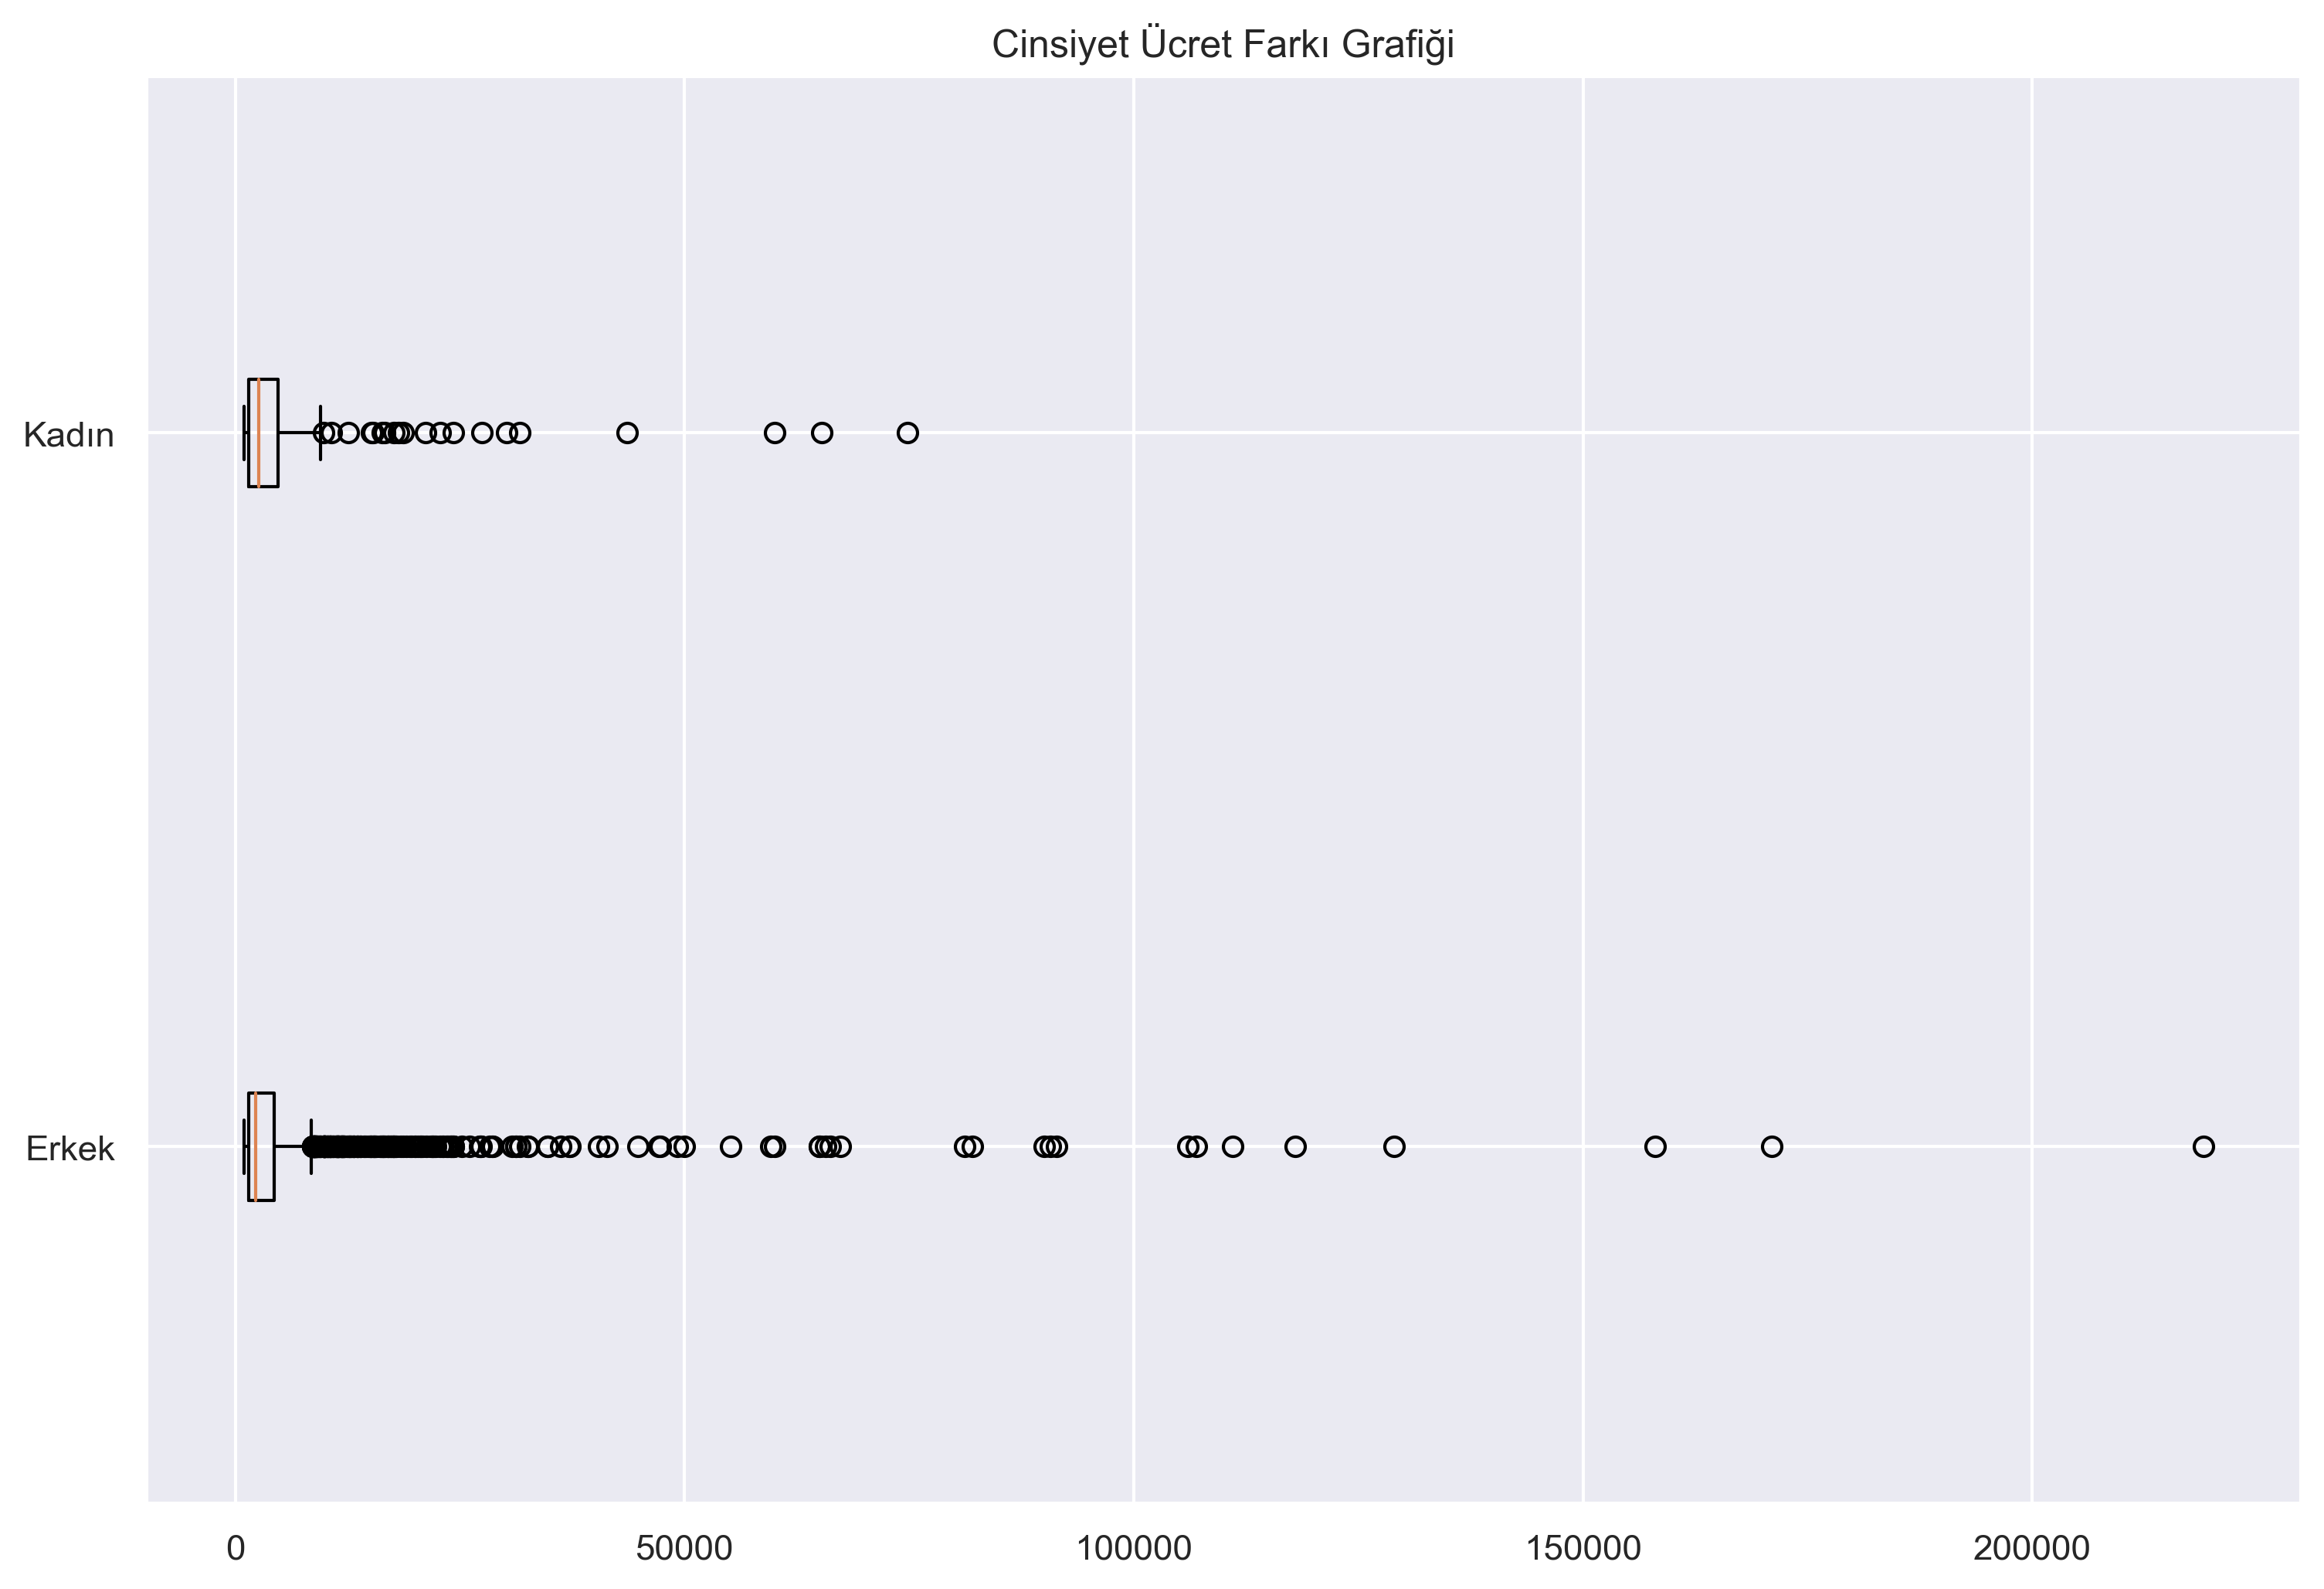

In [36]:


# Erkek milyarderlerin ortalama net değeri
male_mean = df[df.gender == 'M']['finalWorth'].mean()

# Kadın milyarderlerin ortalama net değeri
female_mean = df[df.gender == 'F']['finalWorth'].mean()

# Kutu grafiği oluşturma
data = [df[df.gender == 'M']['finalWorth'], df[df.gender == 'F']['finalWorth']]
fig, ax = plt.subplots()
ax.boxplot(data, vert=False, labels=['Erkek', 'Kadın'])
ax.set_title('Cinsiyet Ücret Farkı Grafiği')
plt.show()


KeyError: 'year'

In [ ]:
# Erkek milyarderlerin ortalama net değeri
male_mean = df[df.gender == 'M']['finalWorth'].mean()

# Kadın milyarderlerin ortalama net değeri
female_mean = df[df.gender == 'F']['finalWorth'].mean()

# Cinsiyetlere göre verileri ayırma
male_data = df[df.gender == 'M']['finalWorth']
female_data = df[df.gender == 'F']['finalWorth']

# Kutu grafiği oluşturma
data = [male_data, female_data]
fig, ax = plt.subplots()
ax.boxplot(data)

# Grafiği özelleştirme
ax.set_xticklabels(['Erkek', 'Kadın'])
ax.set_ylabel('Net Değer')
ax.set_title('Cinsiyet Ücret Farkı Grafiği\nErkeklerin Ortalama Net Değeri: ${:,.2f}\nKadınların Ortalama Net Değeri: ${:,.2f}'.format(male_mean, female_mean))

# Grafiği gösterme
plt.show()


In [ ]:
# Erkek milyarderlerin net değerlerini al
male_worth = df[df.gender == 'M']['finalWorth']

# Kadın milyarderlerin net değerlerini al
female_worth = df[df.gender == 'F']['finalWorth']

# Grafik için veri kümesini oluştur
data = {'Erkek': male_worth, 'Kadın': female_worth}

# Nokta grafiği oluştur
fig, ax = plt.subplots(figsize=(8, 6))
ax.boxplot(data.values())
ax.set_xticklabels(data.keys())
ax.set_ylabel('Net Değer')
ax.set_title('Cinsiyet Ücret Farkı')
plt.show()


In [ ]:
df = pd.read_csv("forbes_2022_billionaires.csv")

# Random 10 ülke seçmek
countries = df['country'].unique().tolist()
selected_countries = random.sample(countries, k=10)

# Seçilen ülkelerdeki erkek ve kadın milyarderlerin net değerlerini almak
male_net_worth = []
female_net_worth = []
for country in selected_countries:
    male_worth = df[(df['country'] == country) & (df['gender'] == 'M')]['finalWorth'].values
    female_worth = df[(df['country'] == country) & (df['gender'] == 'F')]['finalWorth'].values
    male_net_worth.extend(male_worth)
    female_net_worth.extend(female_worth)

# Verileri birleştirme
df_combined = pd.DataFrame({
    'Gender': ['Male']*len(male_net_worth) + ['Female']*len(female_net_worth),
    'Net Worth': male_net_worth + female_net_worth
})

# Grafik oluşturma
sns.violinplot(x='Gender', y='Net Worth', data=df_combined)
plt.title('Cinsiyete Göre Net Değerlerin Dağılımı (Seçilen 10 Ülkede)')
plt.show()


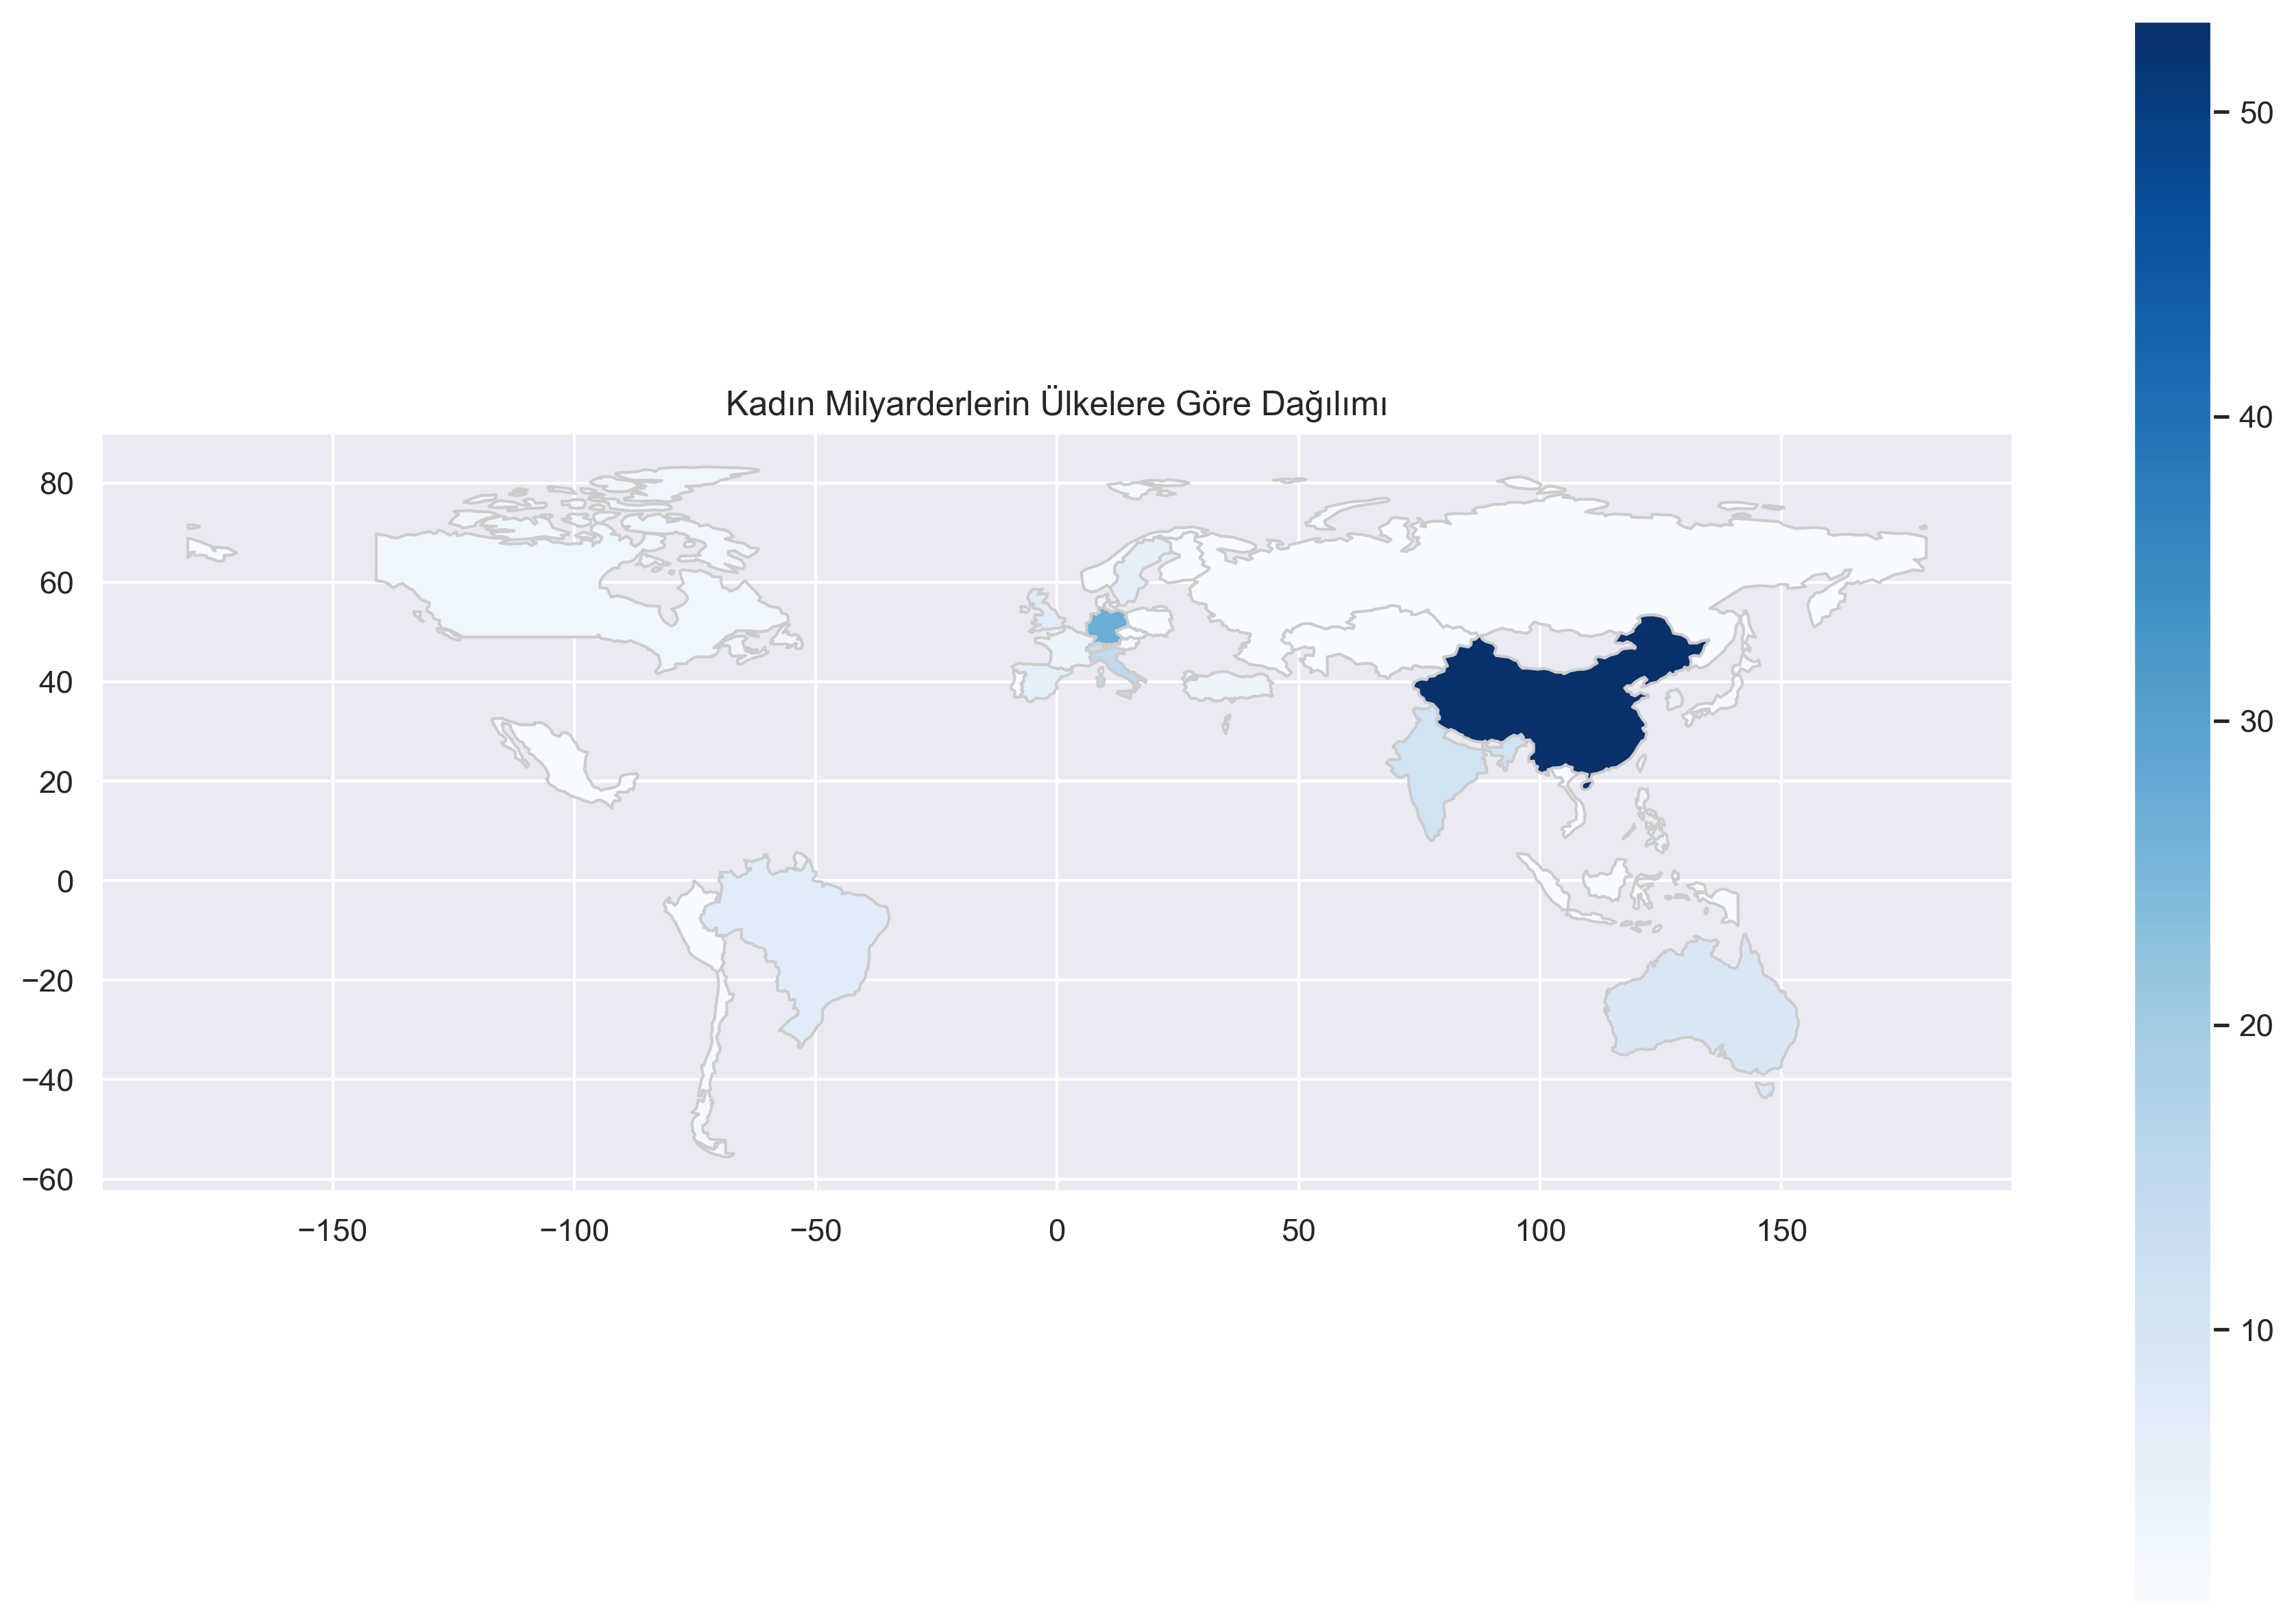

In [38]:
# Veri setini oku
df = pd.read_csv('forbes_2022_billionaires.csv')

# Kadın milyarderlerin seçimi
female_billionaires = df[df['gender'] == 'F']

# Kadın milyarderlerin ülkelere göre gruplandırılması
female_billionaires_by_country = female_billionaires.groupby(['country'])['finalWorth'].count().reset_index()

# Dünya haritasını oku
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Kadın milyarderlerin ülkelerine göre gruplandırılmış verileri dünya haritası ile birleştirme
merged = world.merge(female_billionaires_by_country, left_on='name', right_on='country')

# Harita çizimi
fig, ax = plt.subplots(figsize=(15, 10))
merged.plot(column='finalWorth', ax=ax, legend=True, cmap='Blues', edgecolor='0.8')
ax.set_title("Kadın Milyarderlerin Ülkelere Göre Dağılımı")
plt.show()


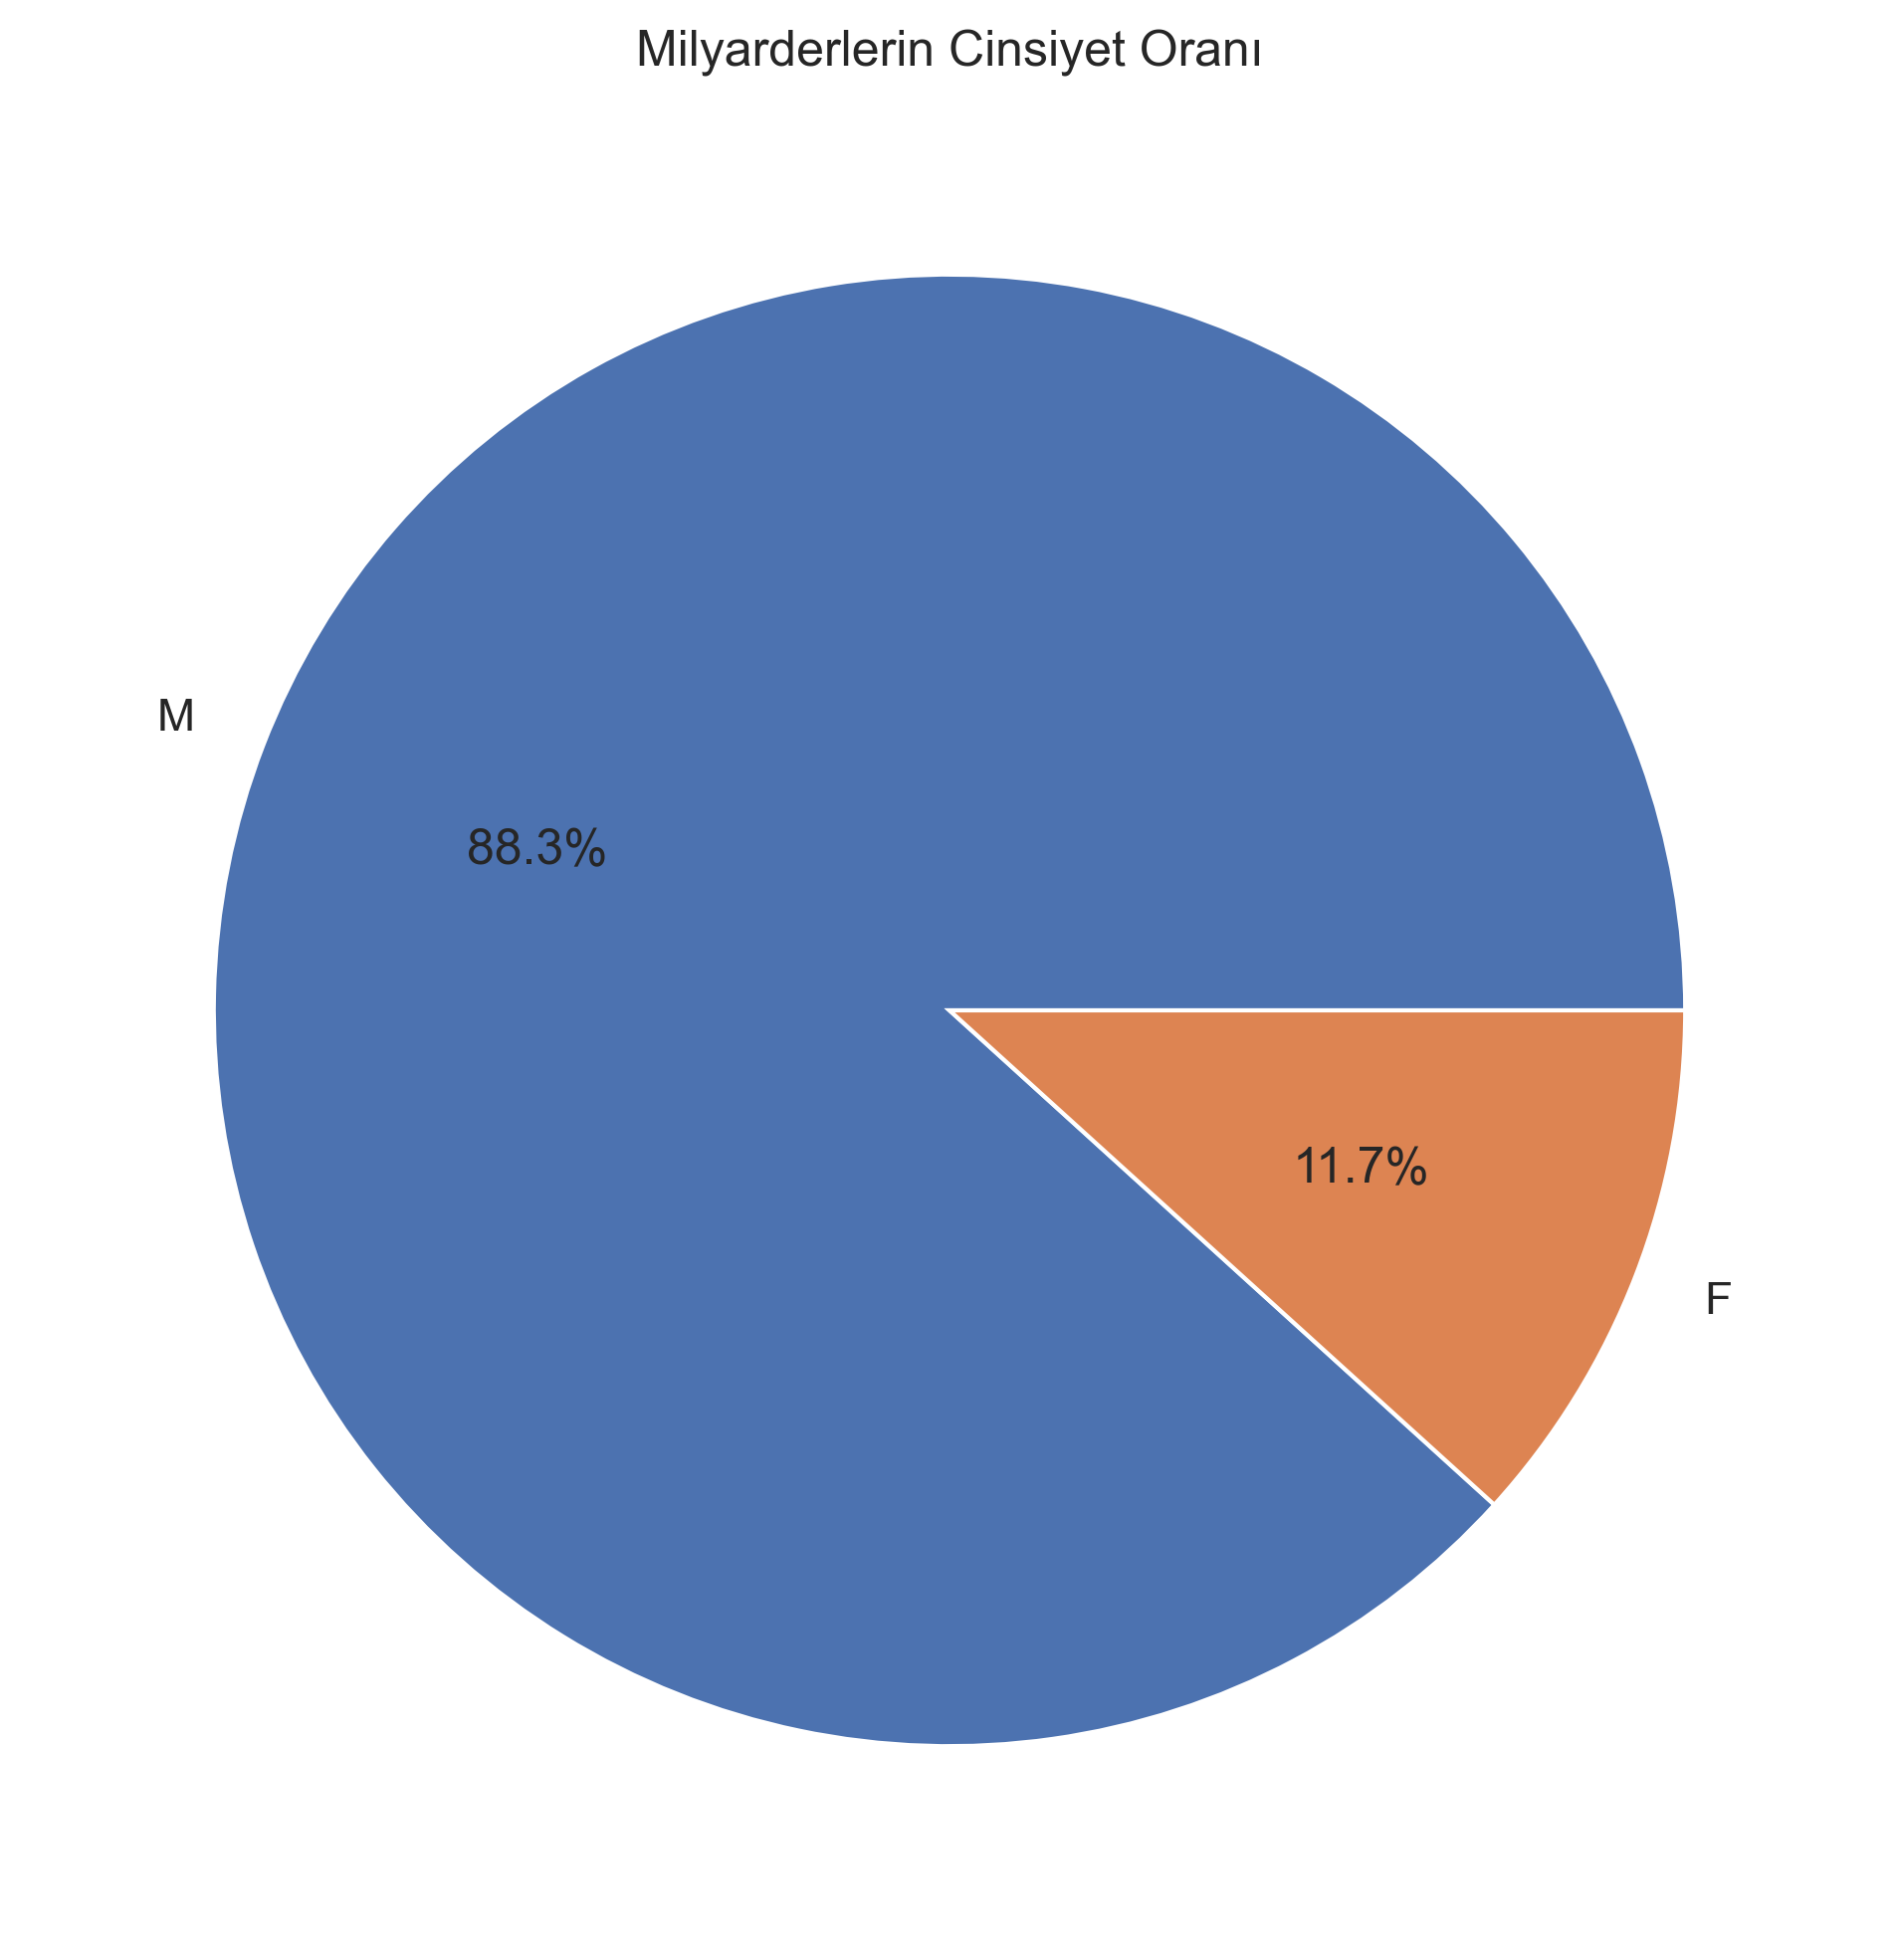

In [39]:

# Cinsiyet oranlarını hesapla
gender_counts = df["gender"].value_counts()

# Pasta grafiği oluştur
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
plt.title("Milyarderlerin Cinsiyet Oranı")
plt.show()



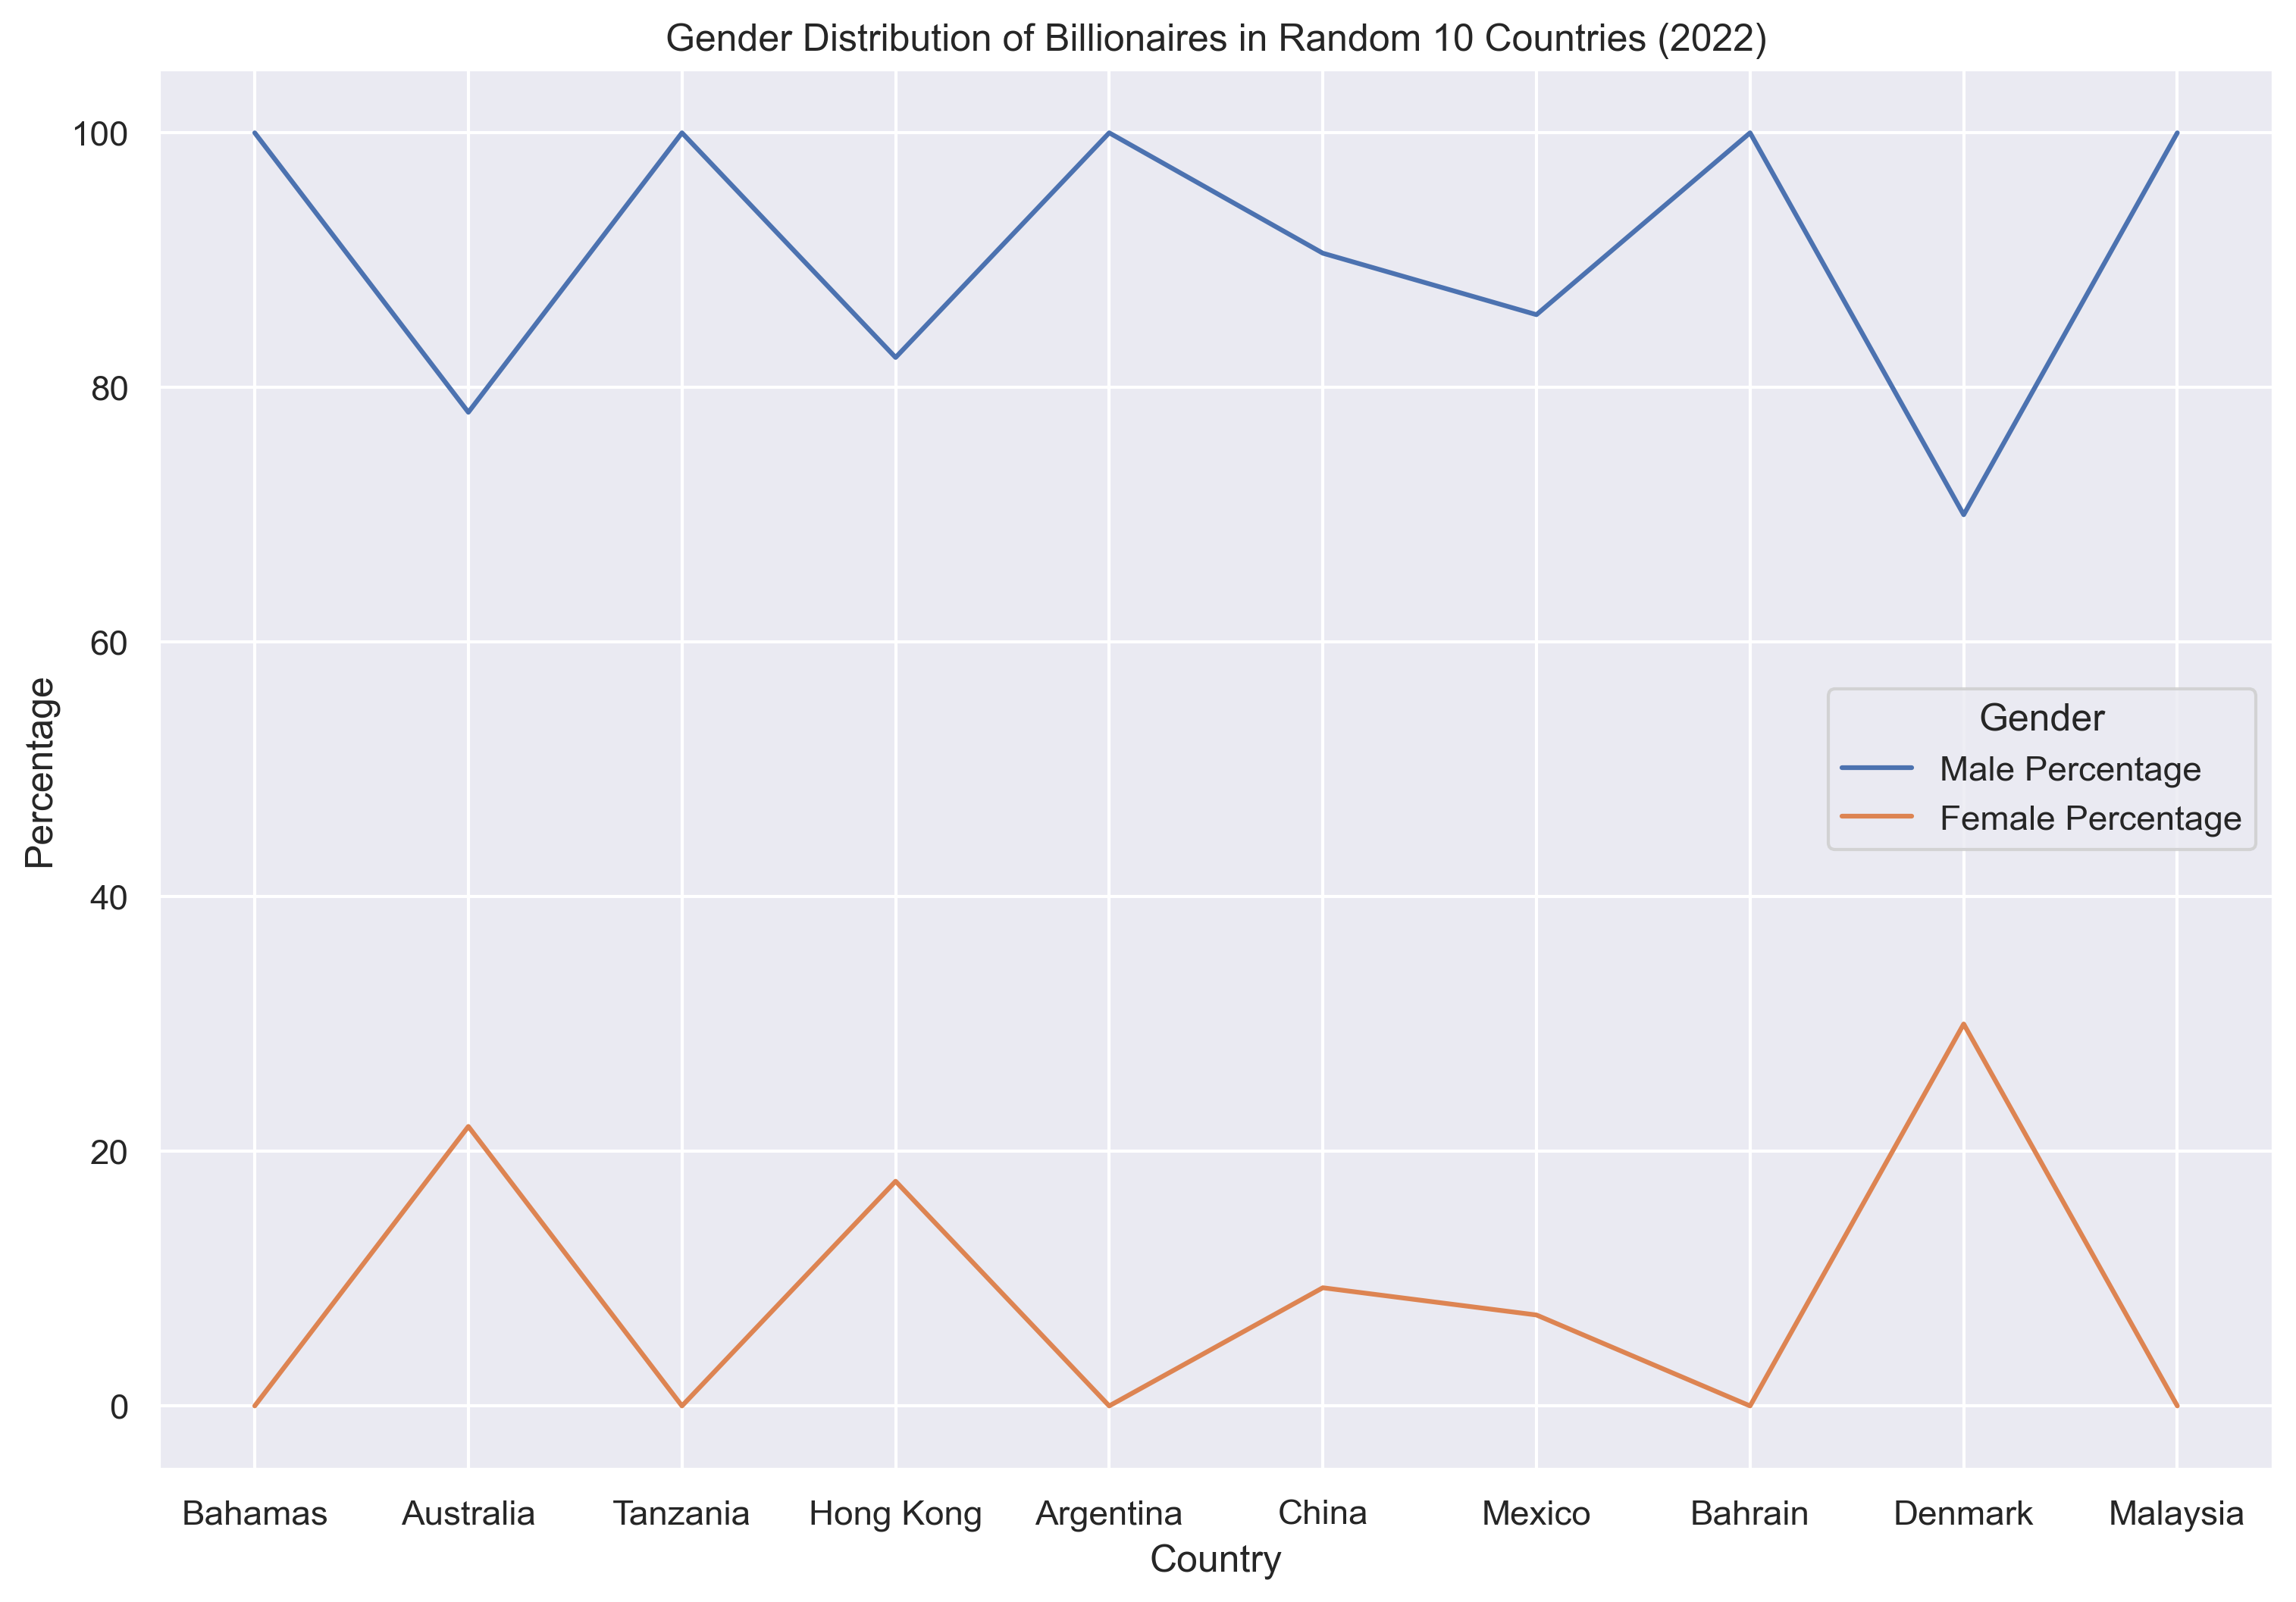

In [40]:
# Rastgele 10 ülke seçimi
random_countries = random.sample(list(df["country"].unique()), 10)

# Seçilen ülkelerdeki milyarderlerin cinsiyet dağılımını hesaplayın
country_gender_counts = []
for country in random_countries:
    billionaires = df[df["country"] == country]["personName"].count()
    male_count = df[(df["country"] == country) & (df["gender"] == "M")]["personName"].count()
    female_count = df[(df["country"] == country) & (df["gender"] == "F")]["personName"].count()
    male_percentage = (male_count / billionaires) * 100
    female_percentage = (female_count / billionaires) * 100
    country_gender_counts.append((country, male_percentage, female_percentage))

# Çizgi grafiği oluşturma
df_country_gender_counts = pd.DataFrame(country_gender_counts, columns=["Country", "Male Percentage", "Female Percentage"])
df_country_gender_counts = df_country_gender_counts.melt(id_vars=["Country"], var_name="Gender", value_name="Percentage")
sns.lineplot(x="Country", y="Percentage", hue="Gender", data=df_country_gender_counts)
plt.title("Gender Distribution of Billionaires in Random 10 Countries (2022)")
plt.xlabel("Country")
plt.ylabel("Percentage")
plt.show()


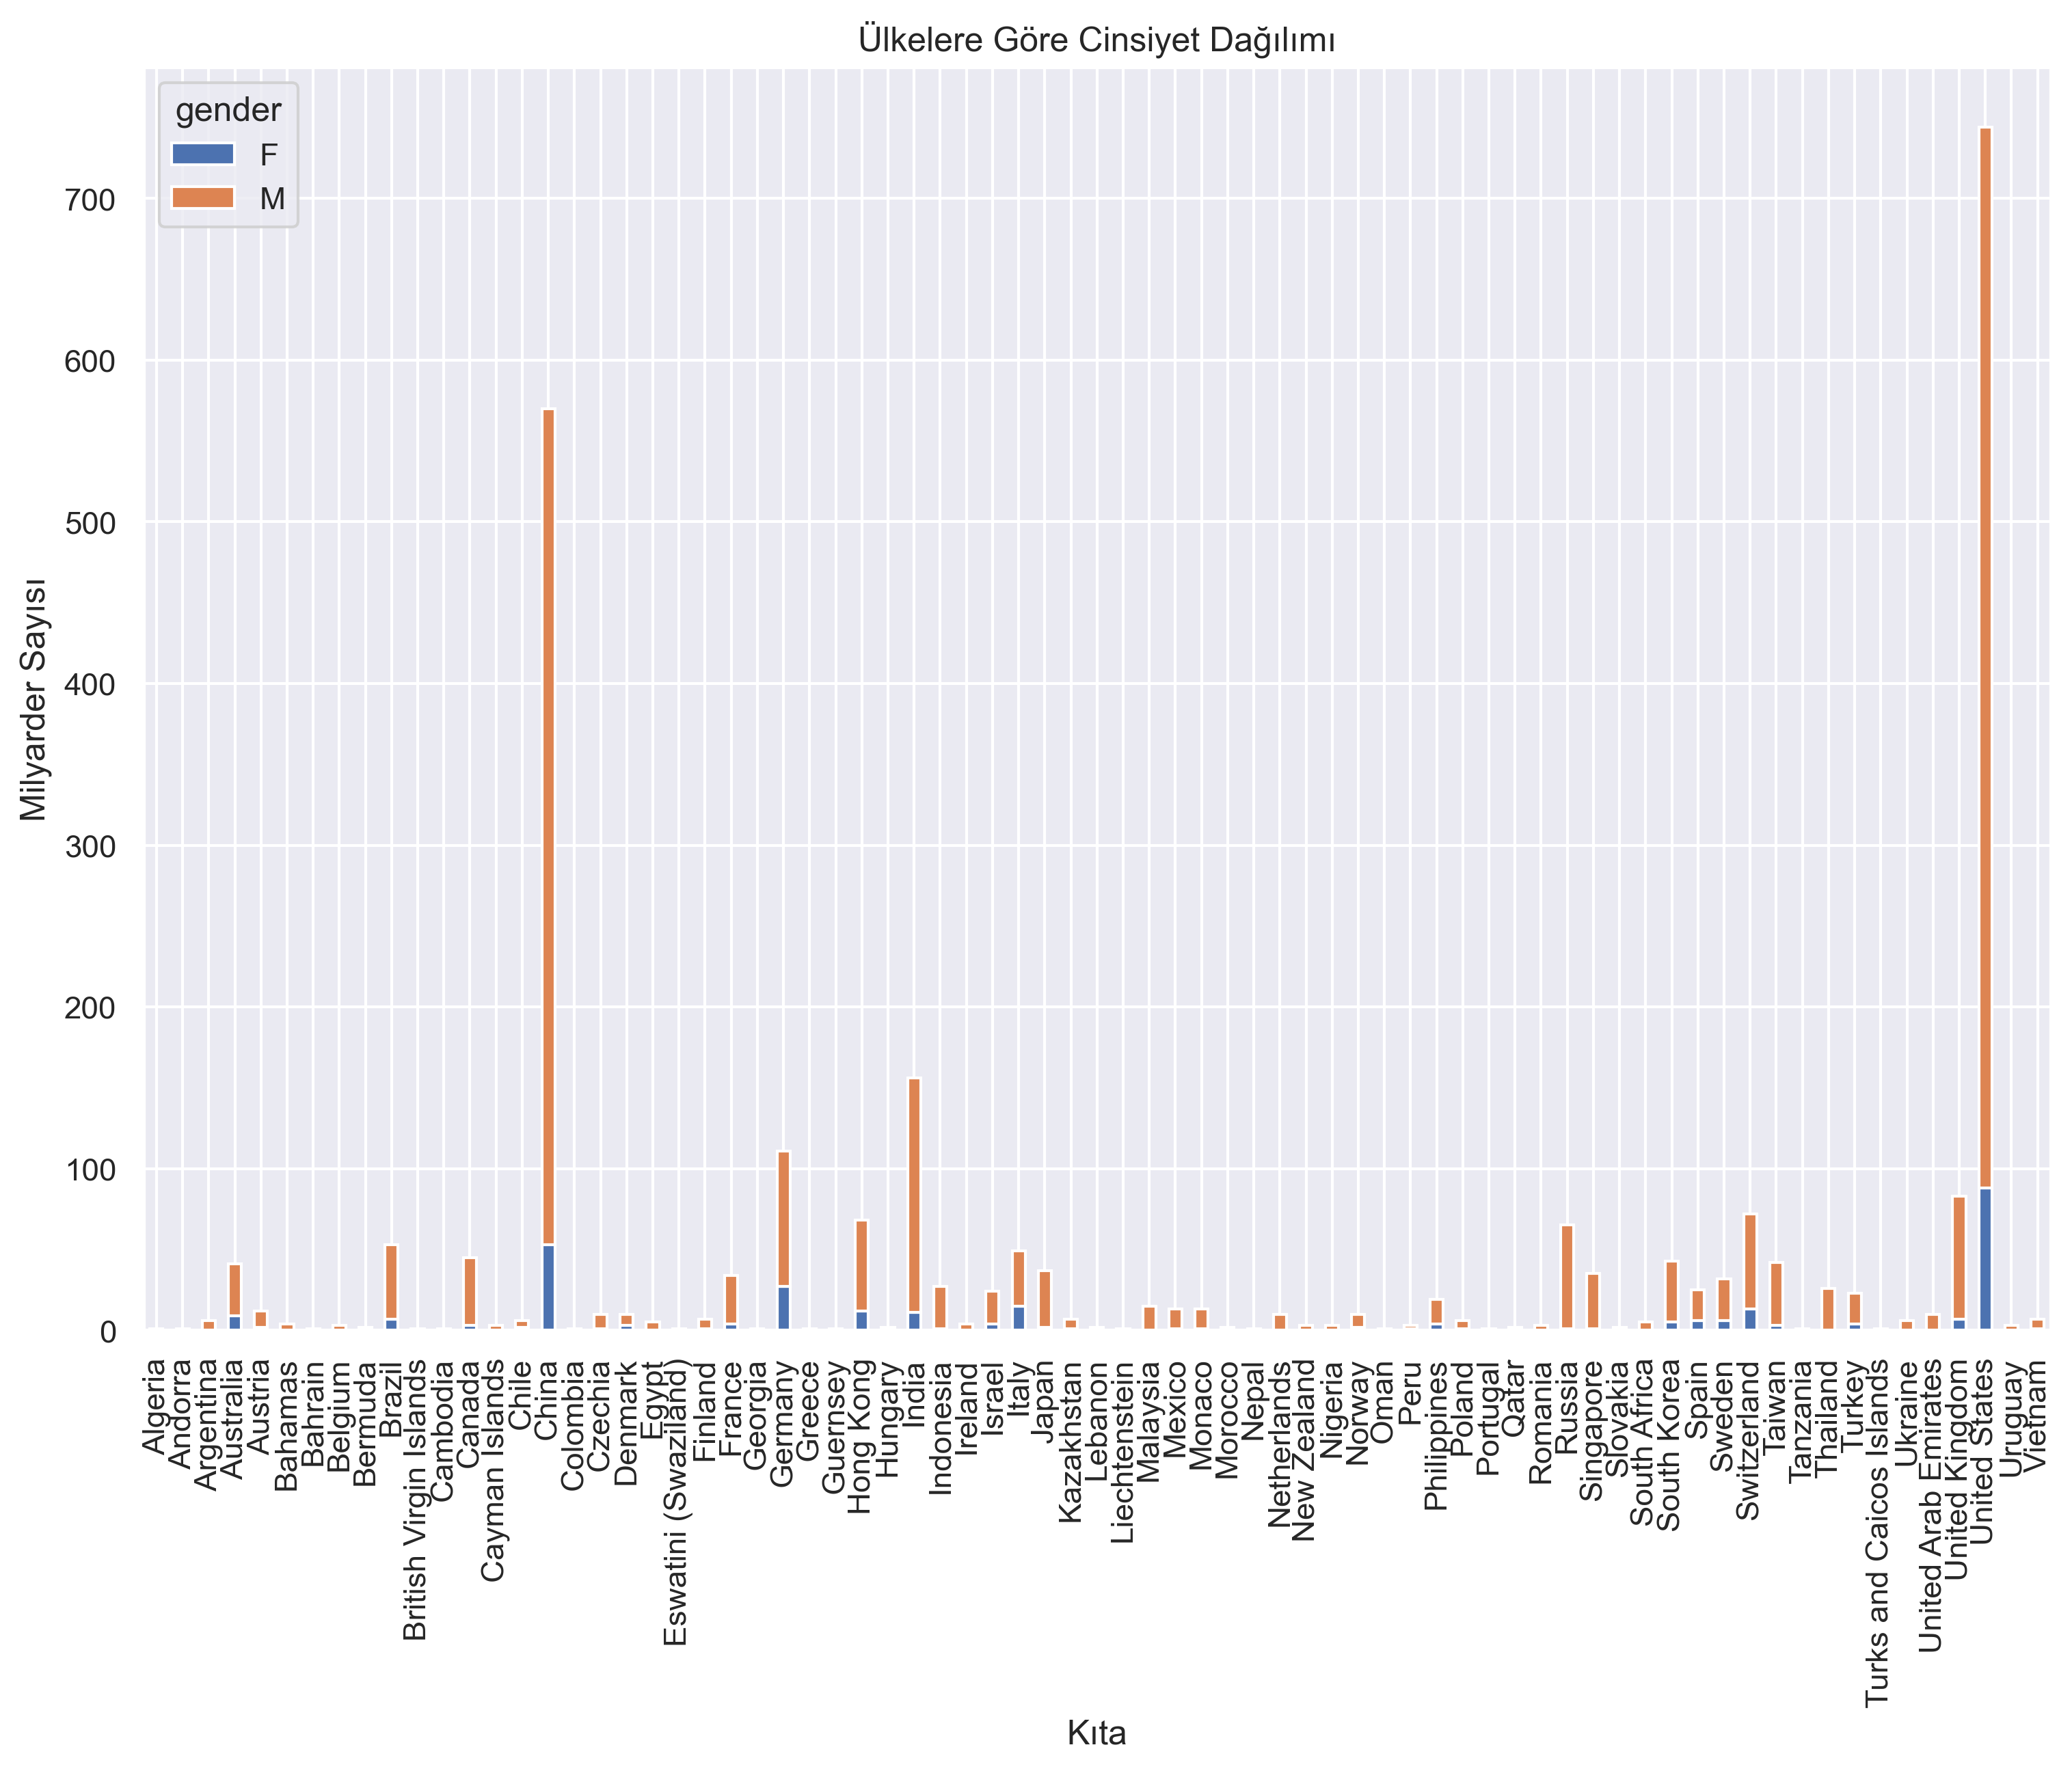

In [41]:
# Kıtalara göre cinsiyet dağılımını hesapla
gender_by_continent = df.groupby(["country", "gender"])["personName"].count().unstack()

# Kadın-erkek oranı grafiğini çizdir
gender_by_continent.plot(kind="bar", stacked=True)

# Eksen ve başlık ayarları
plt.xlabel("Kıta")
plt.ylabel("Milyarder Sayısı")
plt.title("Ülkelere Göre Cinsiyet Dağılımı")

# Grafiği göster
plt.show()


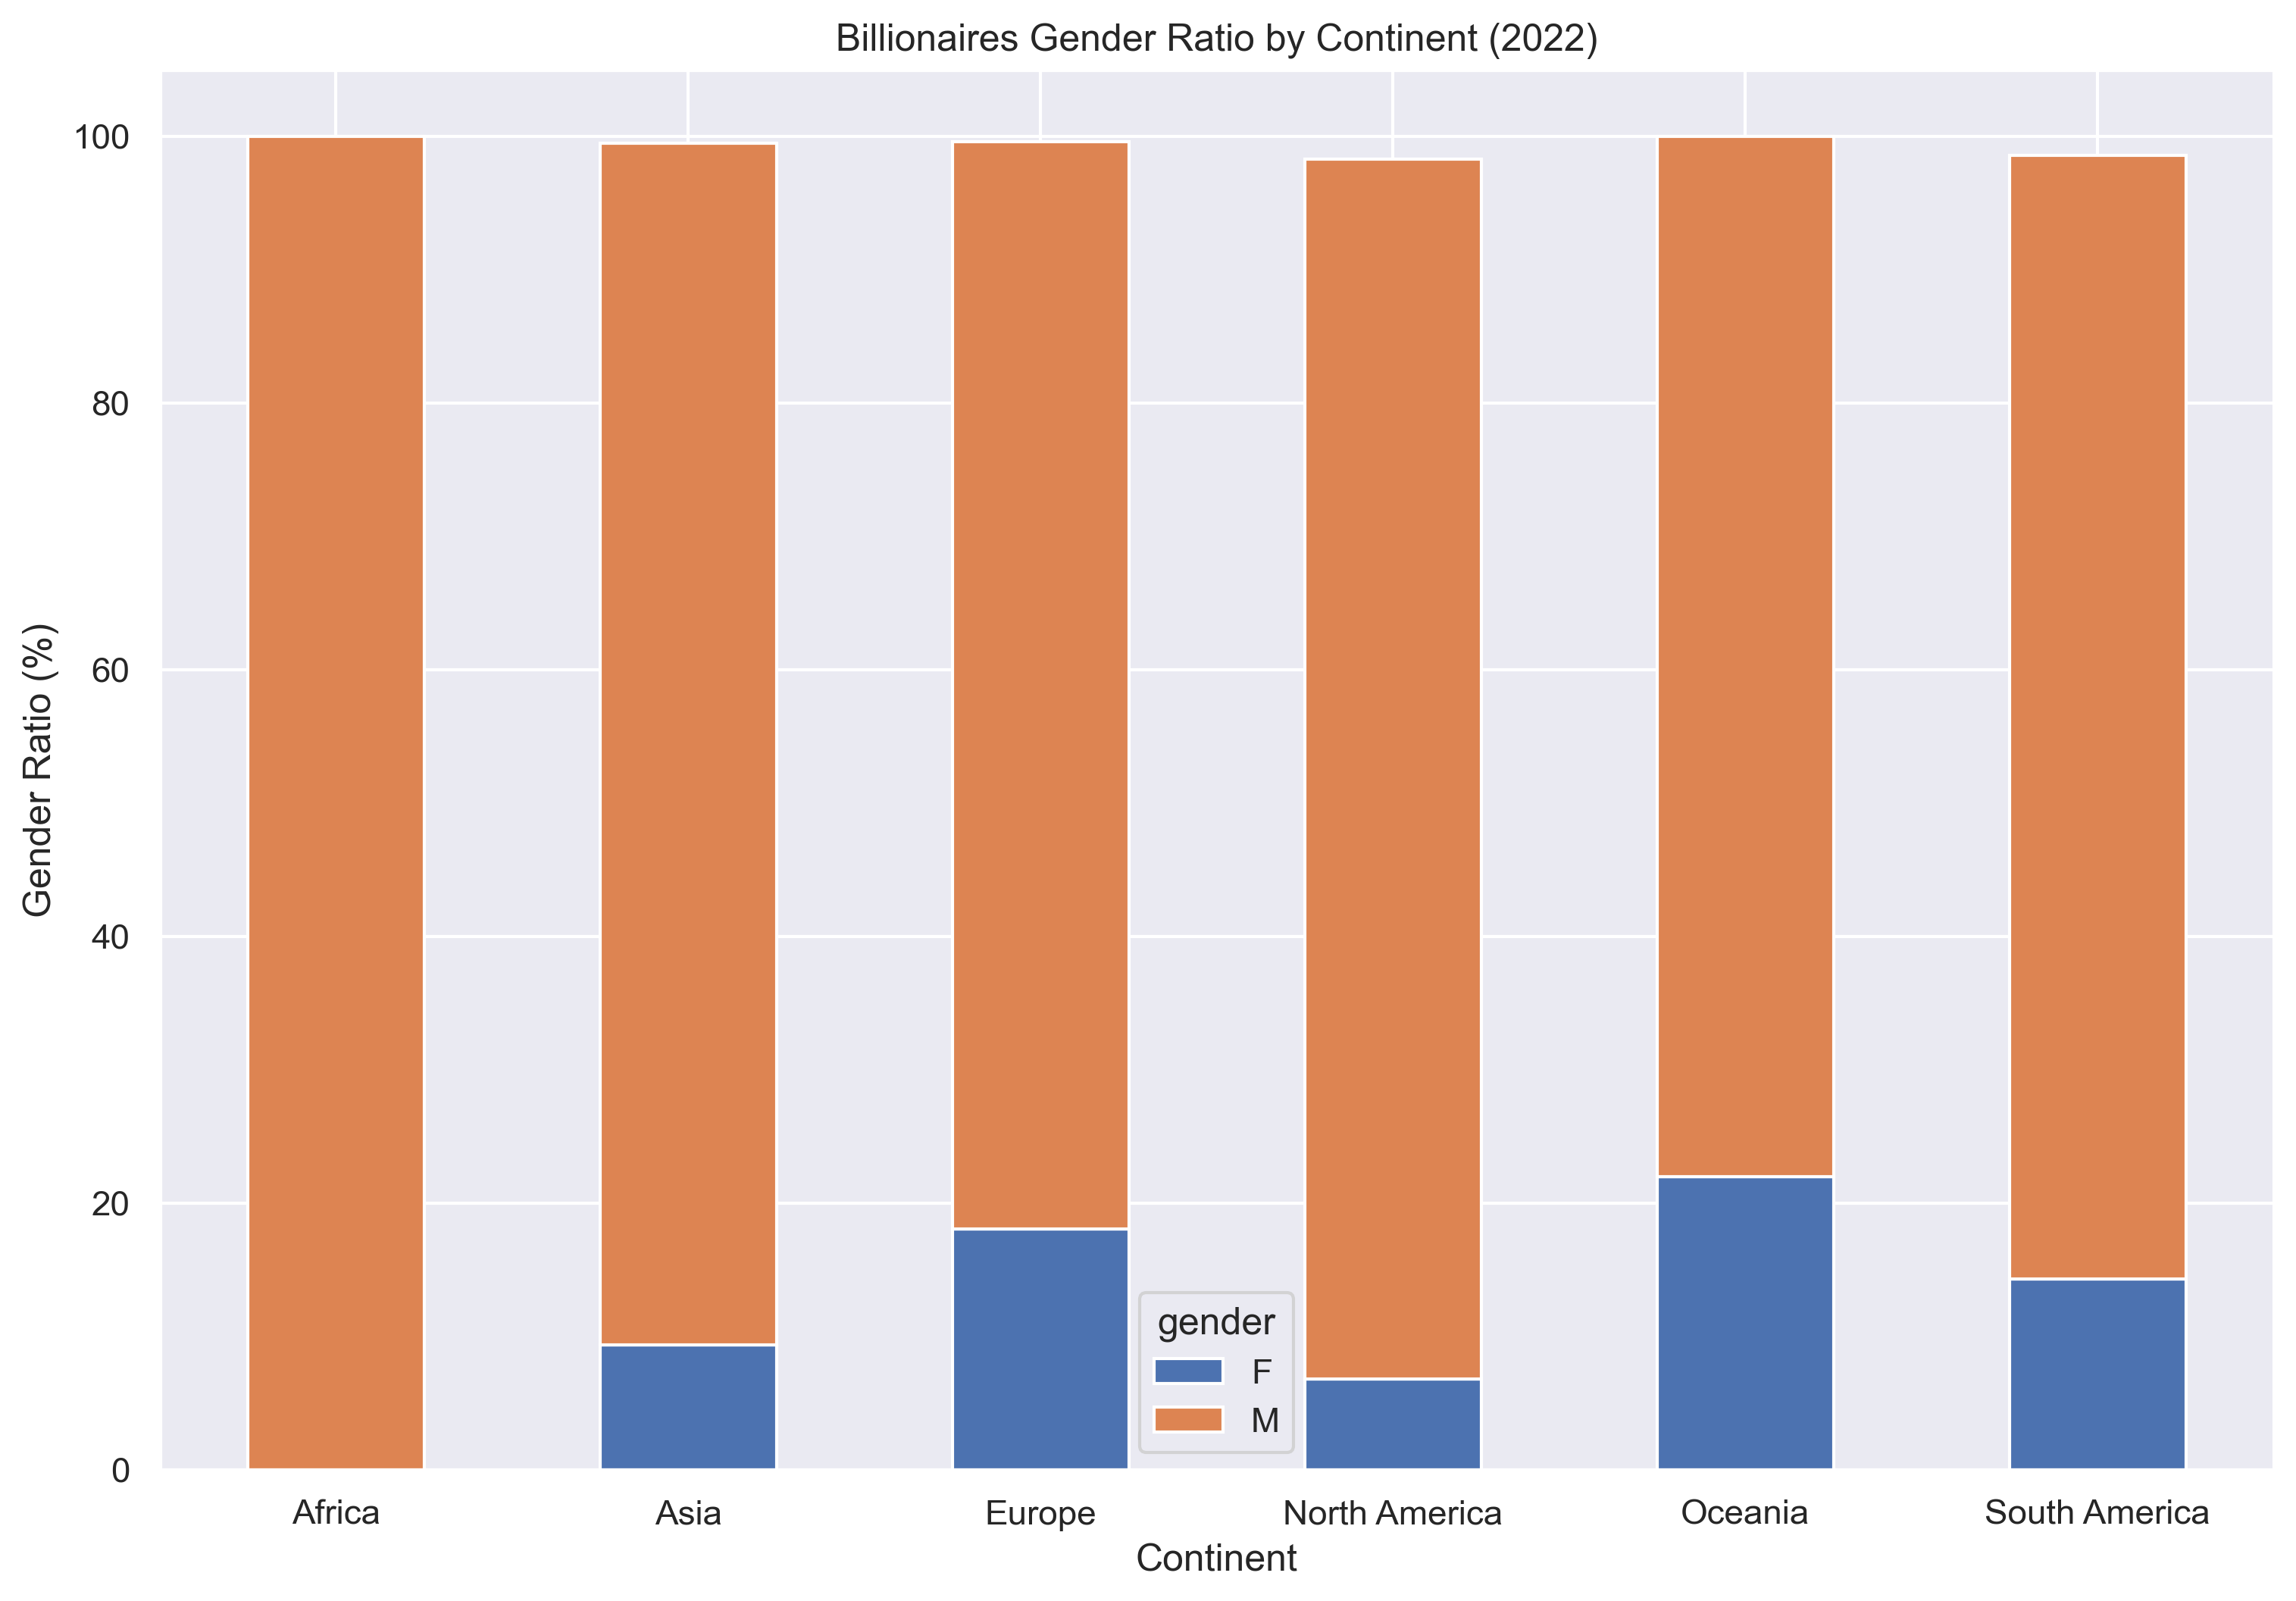

In [42]:
continents = {
    'Asia': ['China', 'India', 'Hong Kong', 'Japan', 'South Korea', 'Taiwan'],
    'Europe': ['Austria', 'Belgium', 'Denmark', 'Finland', 'France', 'Germany', 'Greece', 'Ireland', 'Italy', 'Netherlands', 'Norway', 'Poland', 'Portugal', 'Russia', 'Spain', 'Sweden', 'Switzerland', 'Turkey', 'UK'],
    'North America': ['Canada', 'Mexico', 'USA'],
    'South America': ['Argentina', 'Brazil', 'Chile', 'Colombia', 'Peru'],
    'Africa': ['Egypt', 'Morocco', 'Nigeria', 'South Africa'],
    'Oceania': ['Australia']
}

def group_by_continent(country):
    for continent, countries in continents.items():
        if country in countries:
            return continent
    return None

df['continent'] = df['country'].apply(group_by_continent)

billionaire_counts = df['continent'].value_counts()

gender_counts = df.groupby('continent')['gender'].value_counts().unstack()

gender_ratios = gender_counts.divide(billionaire_counts, axis=0) * 100

gender_ratios.plot(kind='bar', stacked=True)

plt.title('Billionaires Gender Ratio by Continent (2022)')
plt.xlabel('Continent')
plt.ylabel('Gender Ratio (%)')
plt.xticks(rotation=0)

plt.show()


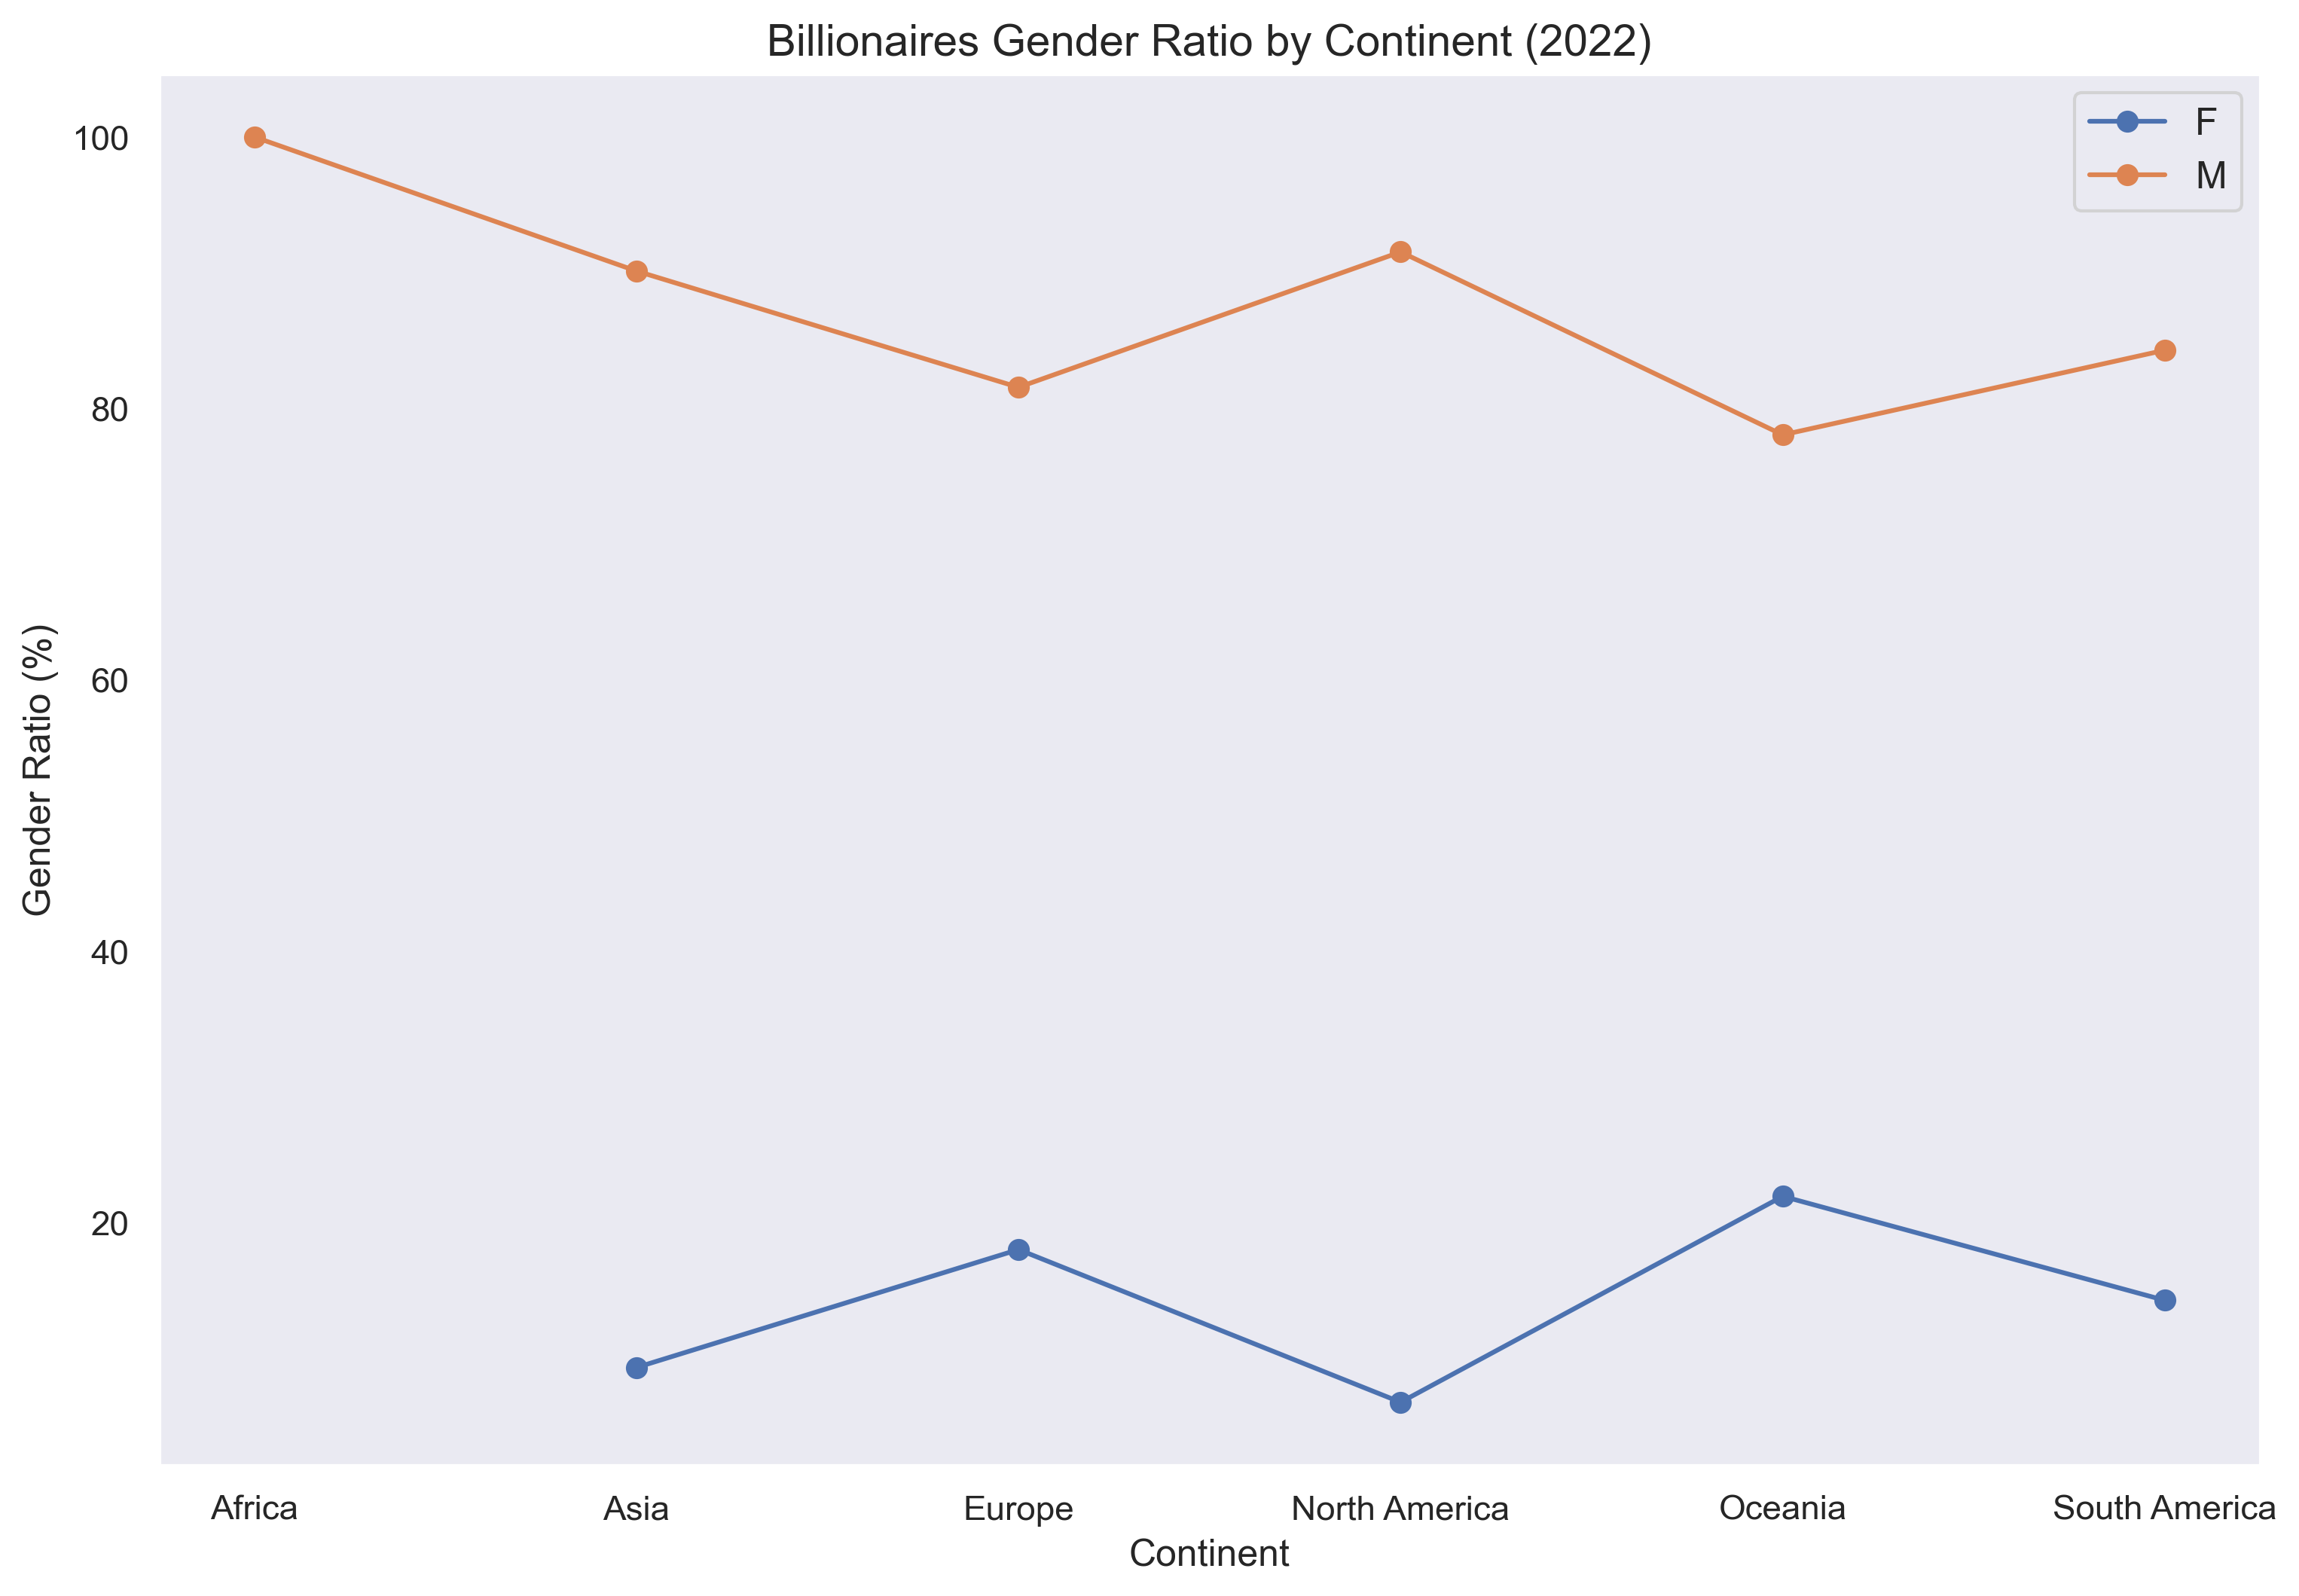

In [43]:
continents = {
    'Asia': ['China', 'India', 'Hong Kong', 'Japan', 'South Korea', 'Taiwan'],
    'Europe': ['Austria', 'Belgium', 'Denmark', 'Finland', 'France', 'Germany', 'Greece', 'Ireland', 'Italy', 'Netherlands', 'Norway', 'Poland', 'Portugal', 'Russia', 'Spain', 'Sweden', 'Switzerland', 'Turkey', 'UK'],
    'North America': ['Canada', 'Mexico', 'USA'],
    'South America': ['Argentina', 'Brazil', 'Chile', 'Colombia', 'Peru'],
    'Africa': ['Egypt', 'Morocco', 'Nigeria', 'South Africa'],
    'Oceania': ['Australia']
}

def group_by_continent(country):
    for continent, countries in continents.items():
        if country in countries:
            return continent
    return None

df['continent'] = df['country'].apply(group_by_continent)

billionaire_counts = df['continent'].value_counts()

gender_counts = df.groupby('continent')['gender'].value_counts().unstack()

gender_ratios = gender_counts.divide(billionaire_counts, axis=0) * 100

ax = gender_ratios.plot(kind='line', marker='o')

ax.set_title('Billionaires Gender Ratio by Continent (2022)', fontsize=14)
ax.set_xlabel('Continent', fontsize=12)
ax.set_ylabel('Gender Ratio (%)', fontsize=12)
ax.legend(fontsize=12)

plt.xticks(rotation=0)
plt.grid()

plt.show()


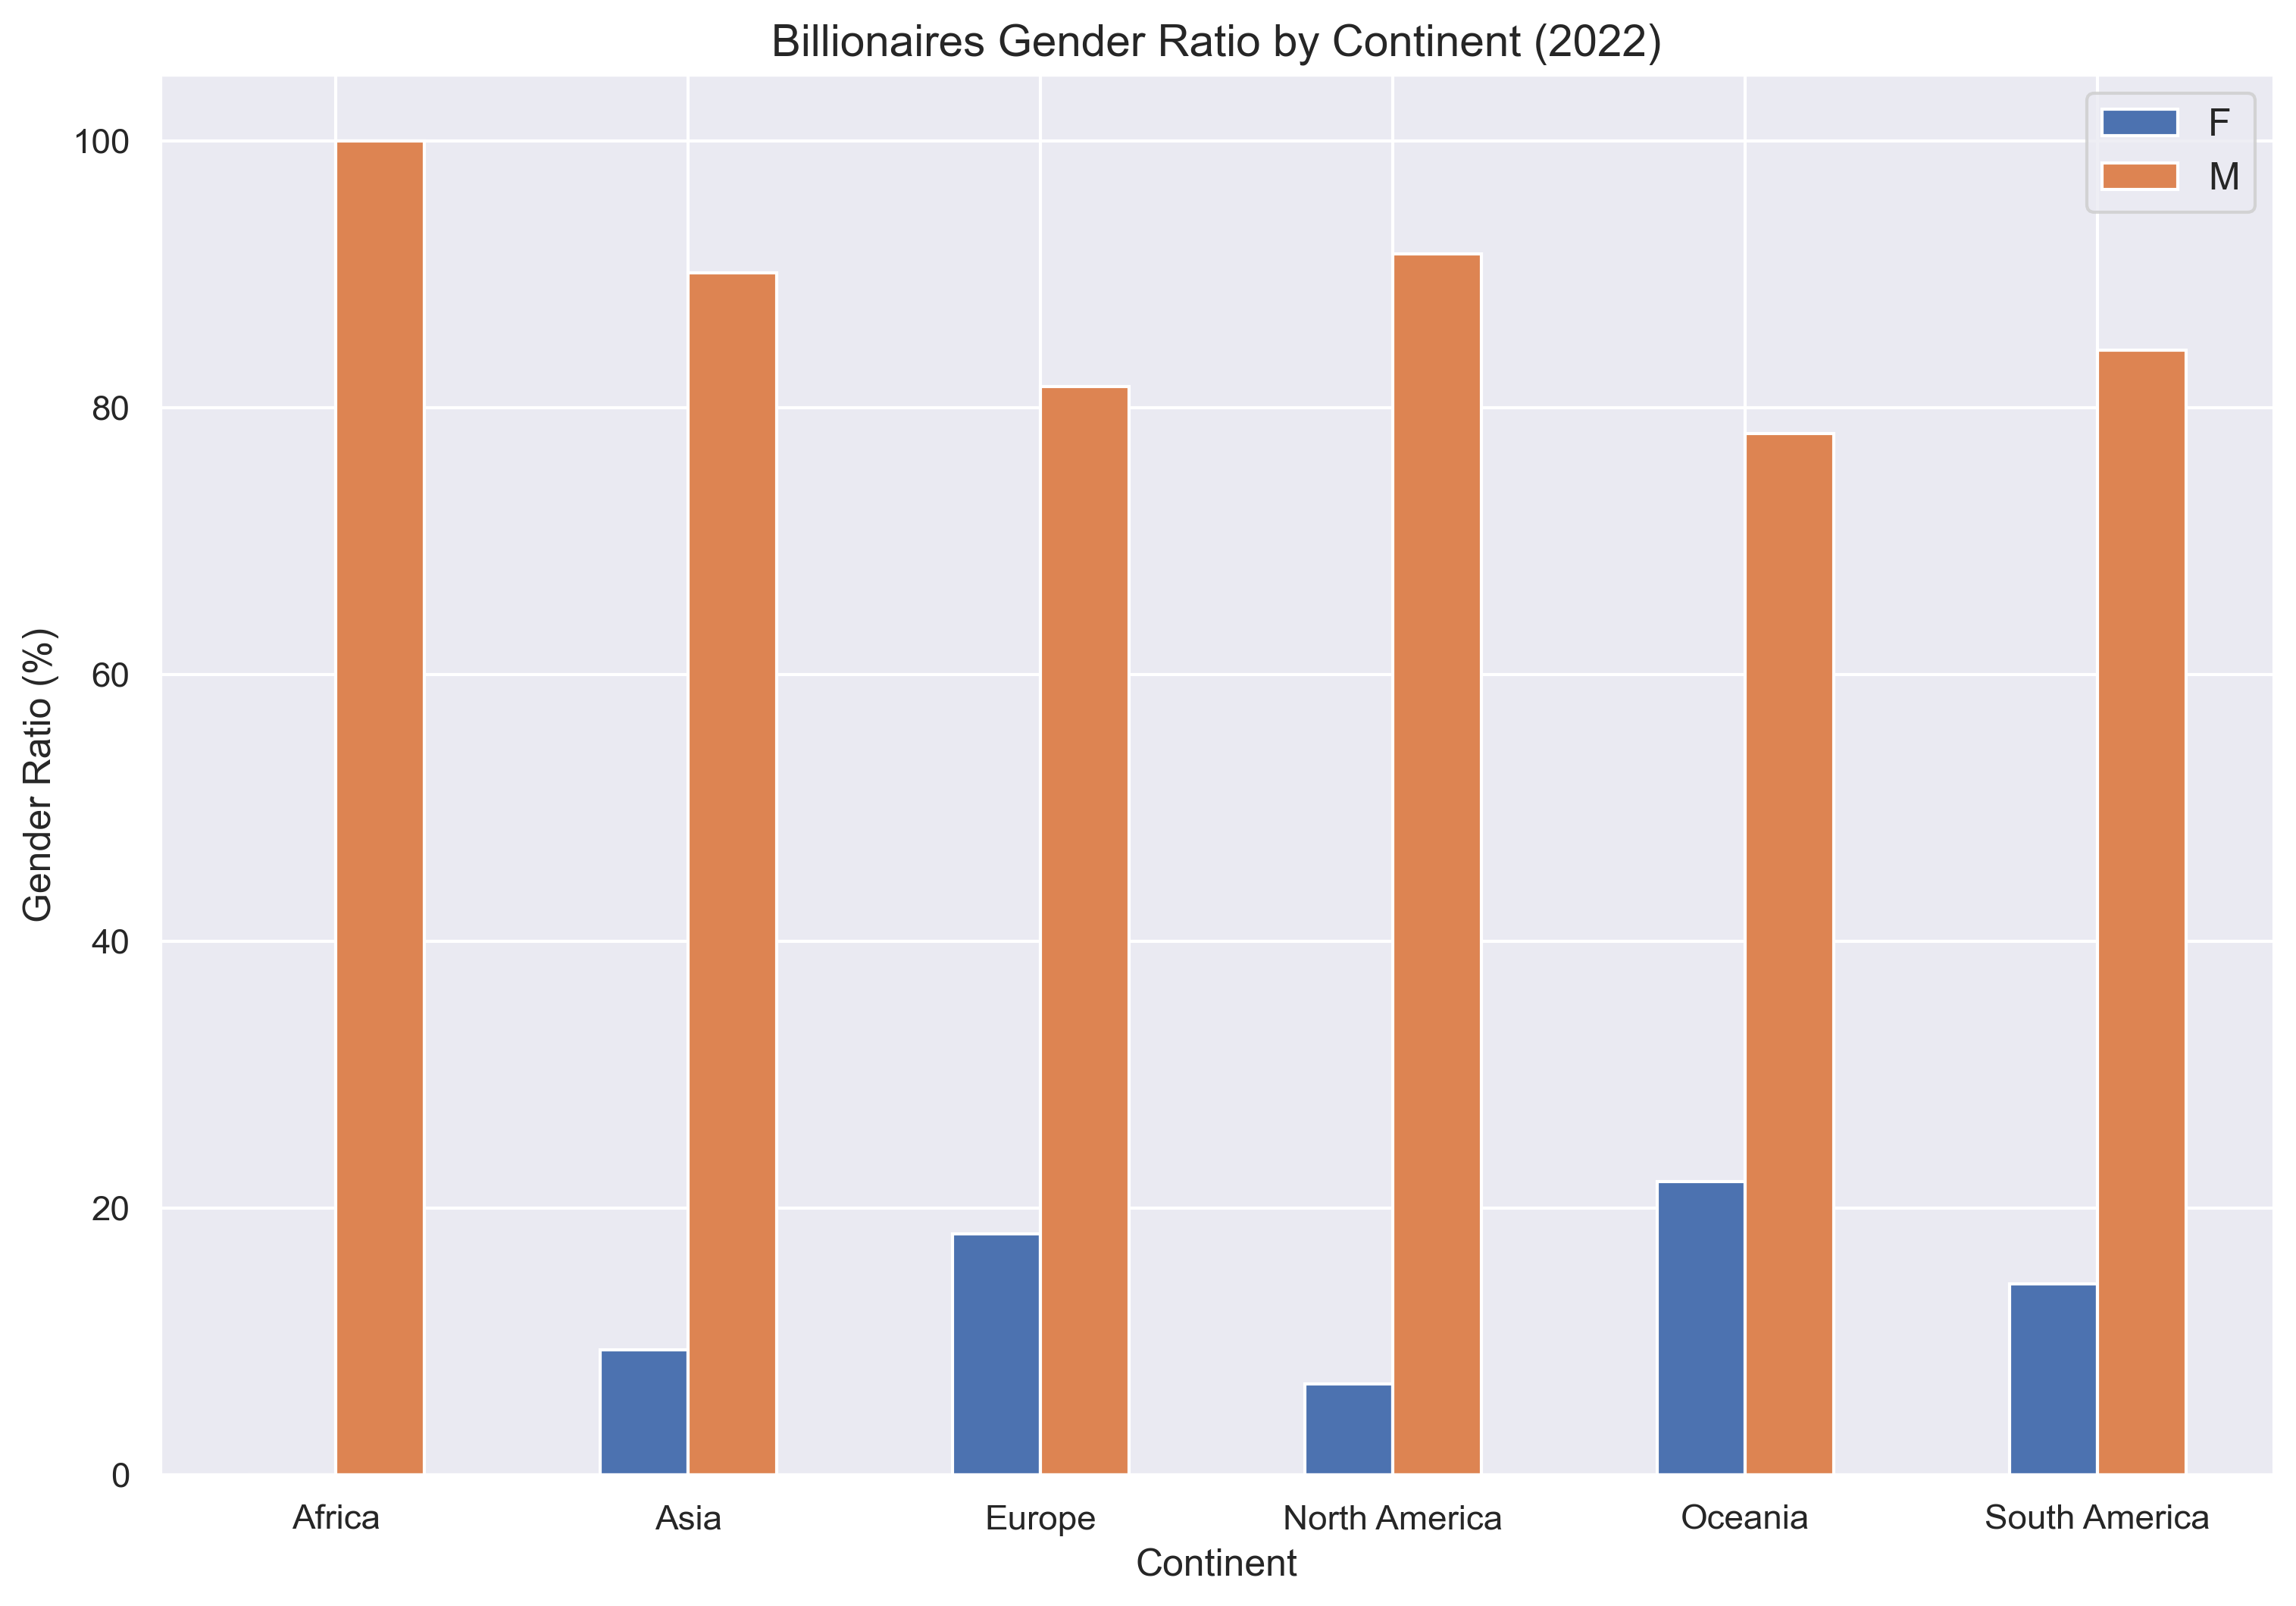

In [44]:
continents = {
    'Asia': ['China', 'India', 'Hong Kong', 'Japan', 'South Korea', 'Taiwan'],
    'Europe': ['Austria', 'Belgium', 'Denmark', 'Finland', 'France', 'Germany', 'Greece', 'Ireland', 'Italy', 'Netherlands', 'Norway', 'Poland', 'Portugal', 'Russia', 'Spain', 'Sweden', 'Switzerland', 'Turkey', 'UK'],
    'North America': ['Canada', 'Mexico', 'USA'],
    'South America': ['Argentina', 'Brazil', 'Chile', 'Colombia', 'Peru'],
    'Africa': ['Egypt', 'Morocco', 'Nigeria', 'South Africa'],
    'Oceania': ['Australia']
}

def group_by_continent(country):
    for continent, countries in continents.items():
        if country in countries:
            return continent
    return None

df['continent'] = df['country'].apply(group_by_continent)

billionaire_counts = df['continent'].value_counts()

gender_counts = df.groupby('continent')['gender'].value_counts().unstack()

gender_ratios = gender_counts.divide(billionaire_counts, axis=0) * 100

ax = gender_ratios.plot(kind='bar', rot=0)

ax.set_title('Billionaires Gender Ratio by Continent (2022)', fontsize=14)
ax.set_xlabel('Continent', fontsize=12)
ax.set_ylabel('Gender Ratio (%)', fontsize=12)
ax.legend(fontsize=12)

plt.show()


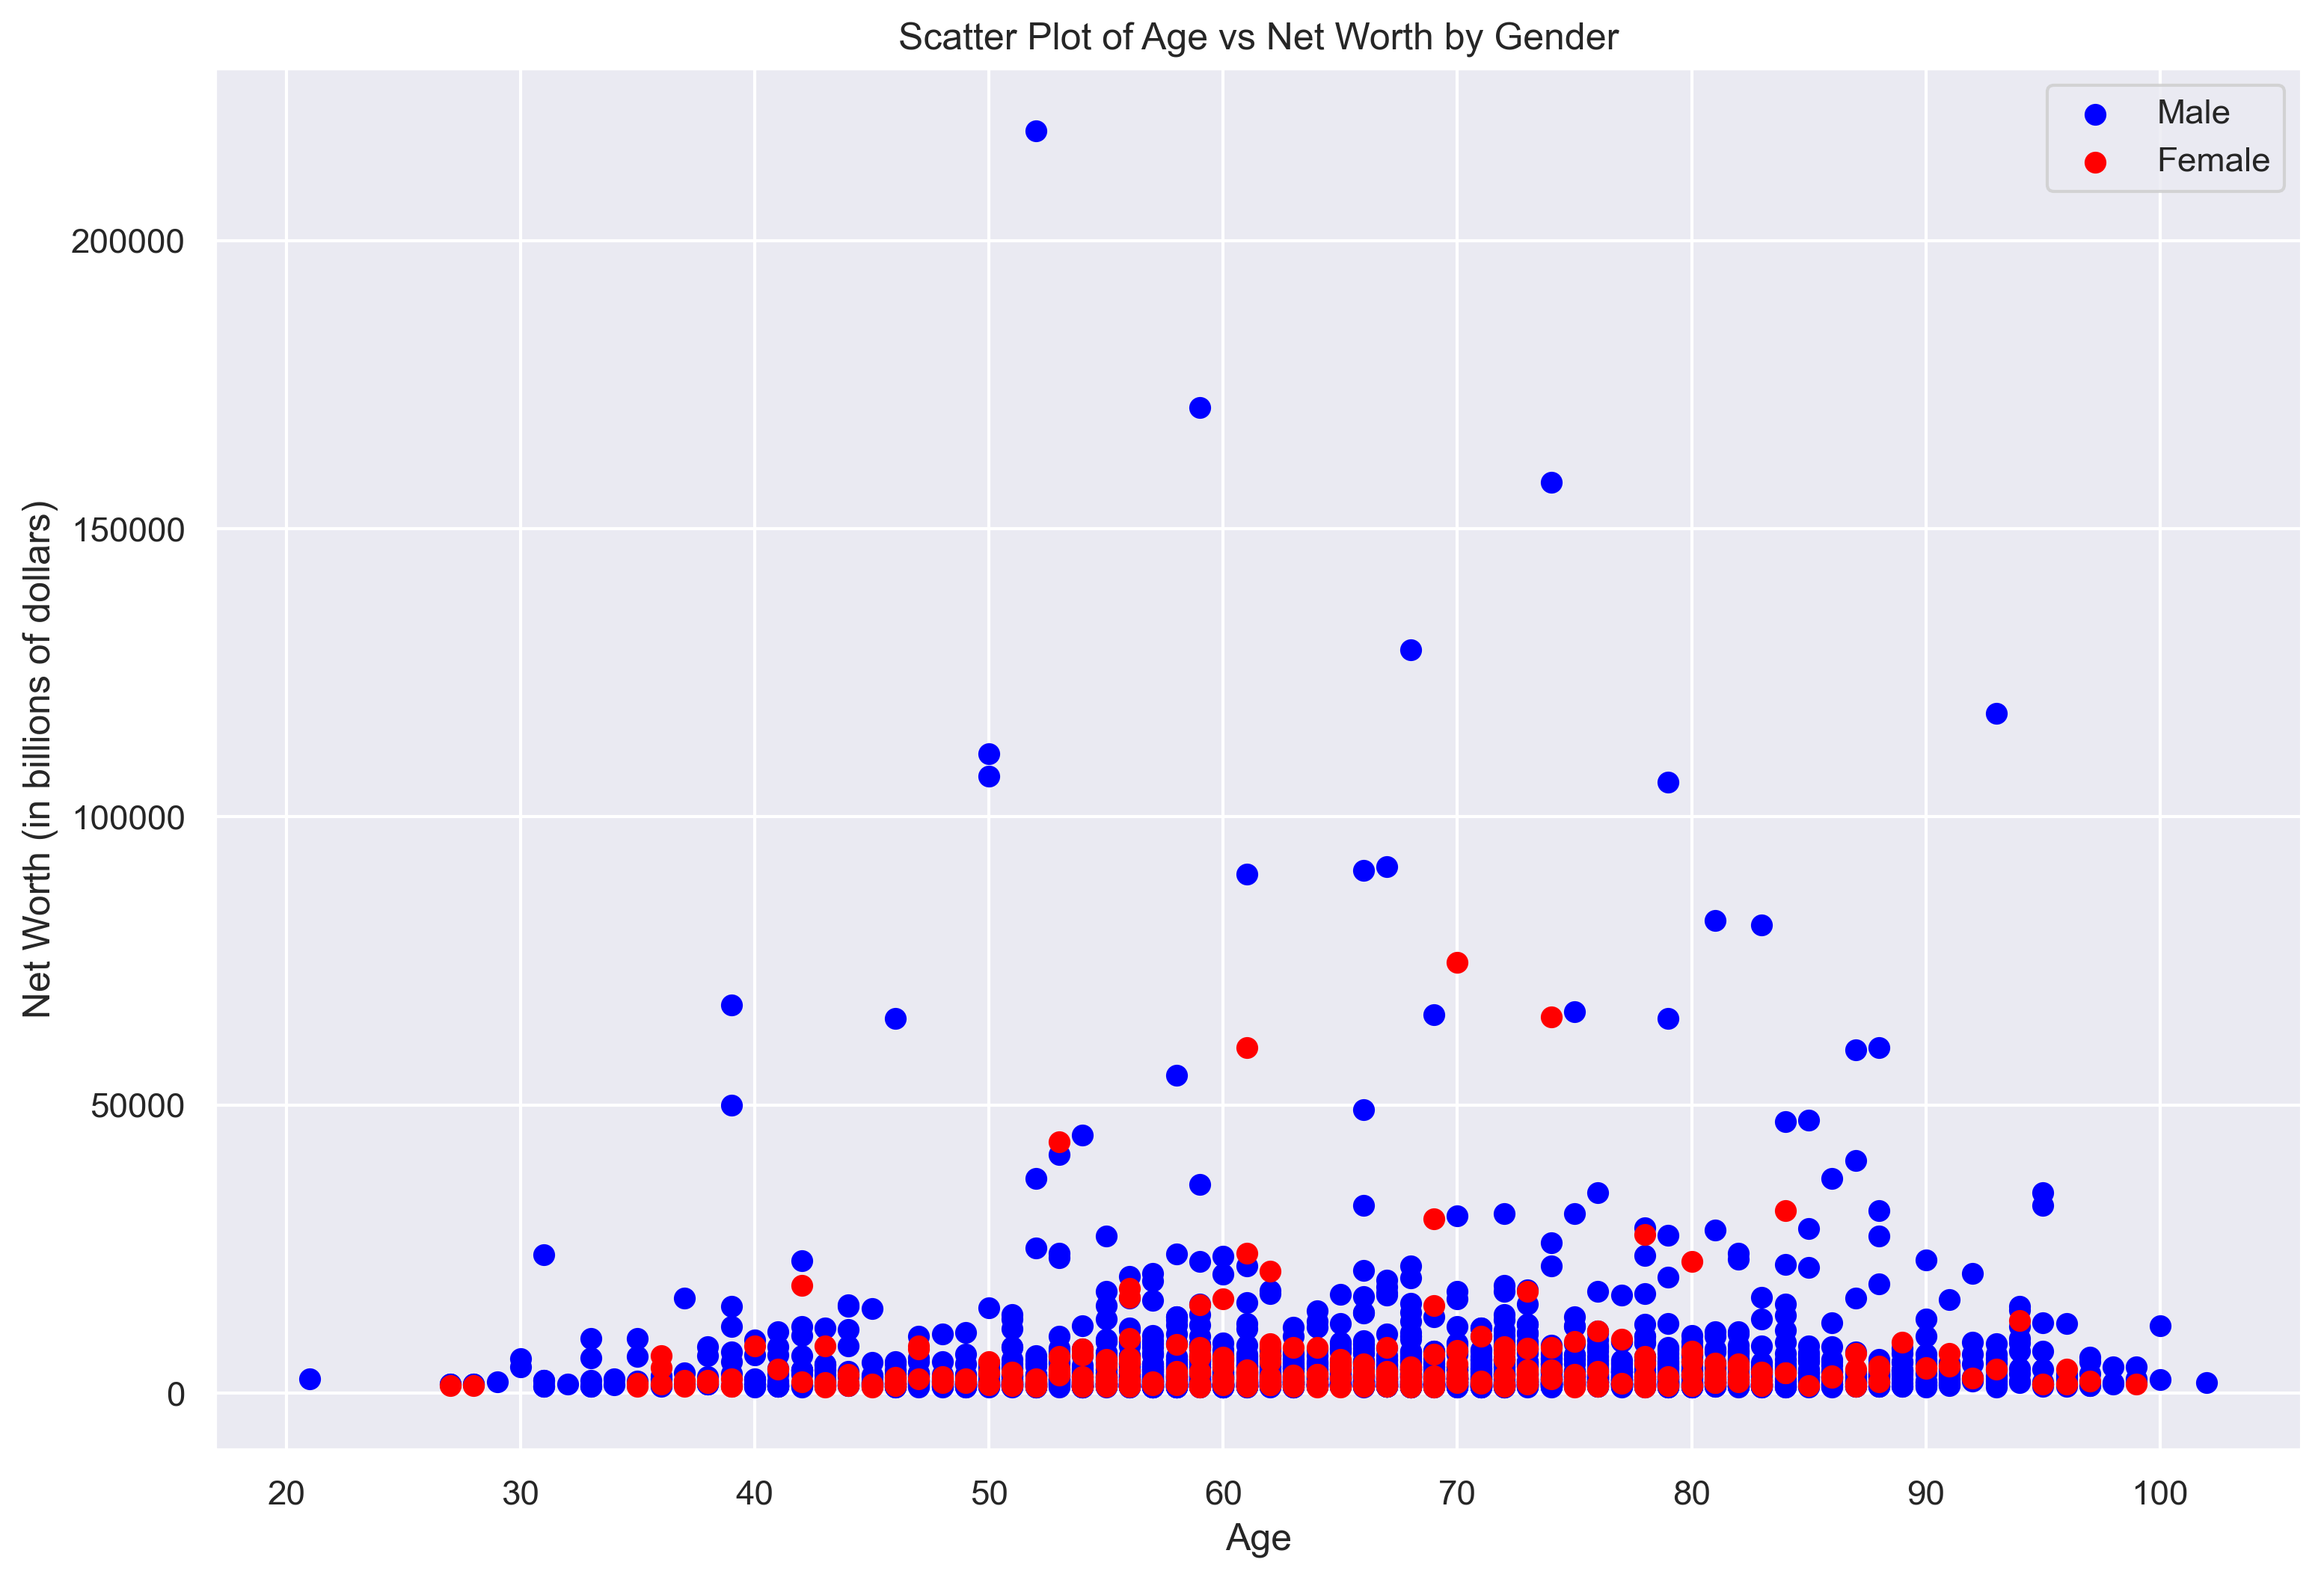

In [45]:
# Yaş bilgisini hesapla
now = datetime.datetime.now()
df['Age'] = now.year - pd.DatetimeIndex(df['birthDate']).year

# Cinsiyete göre ayrı veri setleri oluştur
male = df[df['gender'] == 'M']
female = df[df['gender'] == 'F']

# Saçılım grafiği
plt.scatter(male['Age'], male['finalWorth'], color='blue', label='Male')
plt.scatter(female['Age'], female['finalWorth'], color='red', label='Female')

# Grafik özellikleri
plt.xlabel('Age')
plt.ylabel('Net Worth (in billions of dollars)')
plt.title('Scatter Plot of Age vs Net Worth by Gender')
plt.legend()

plt.show()


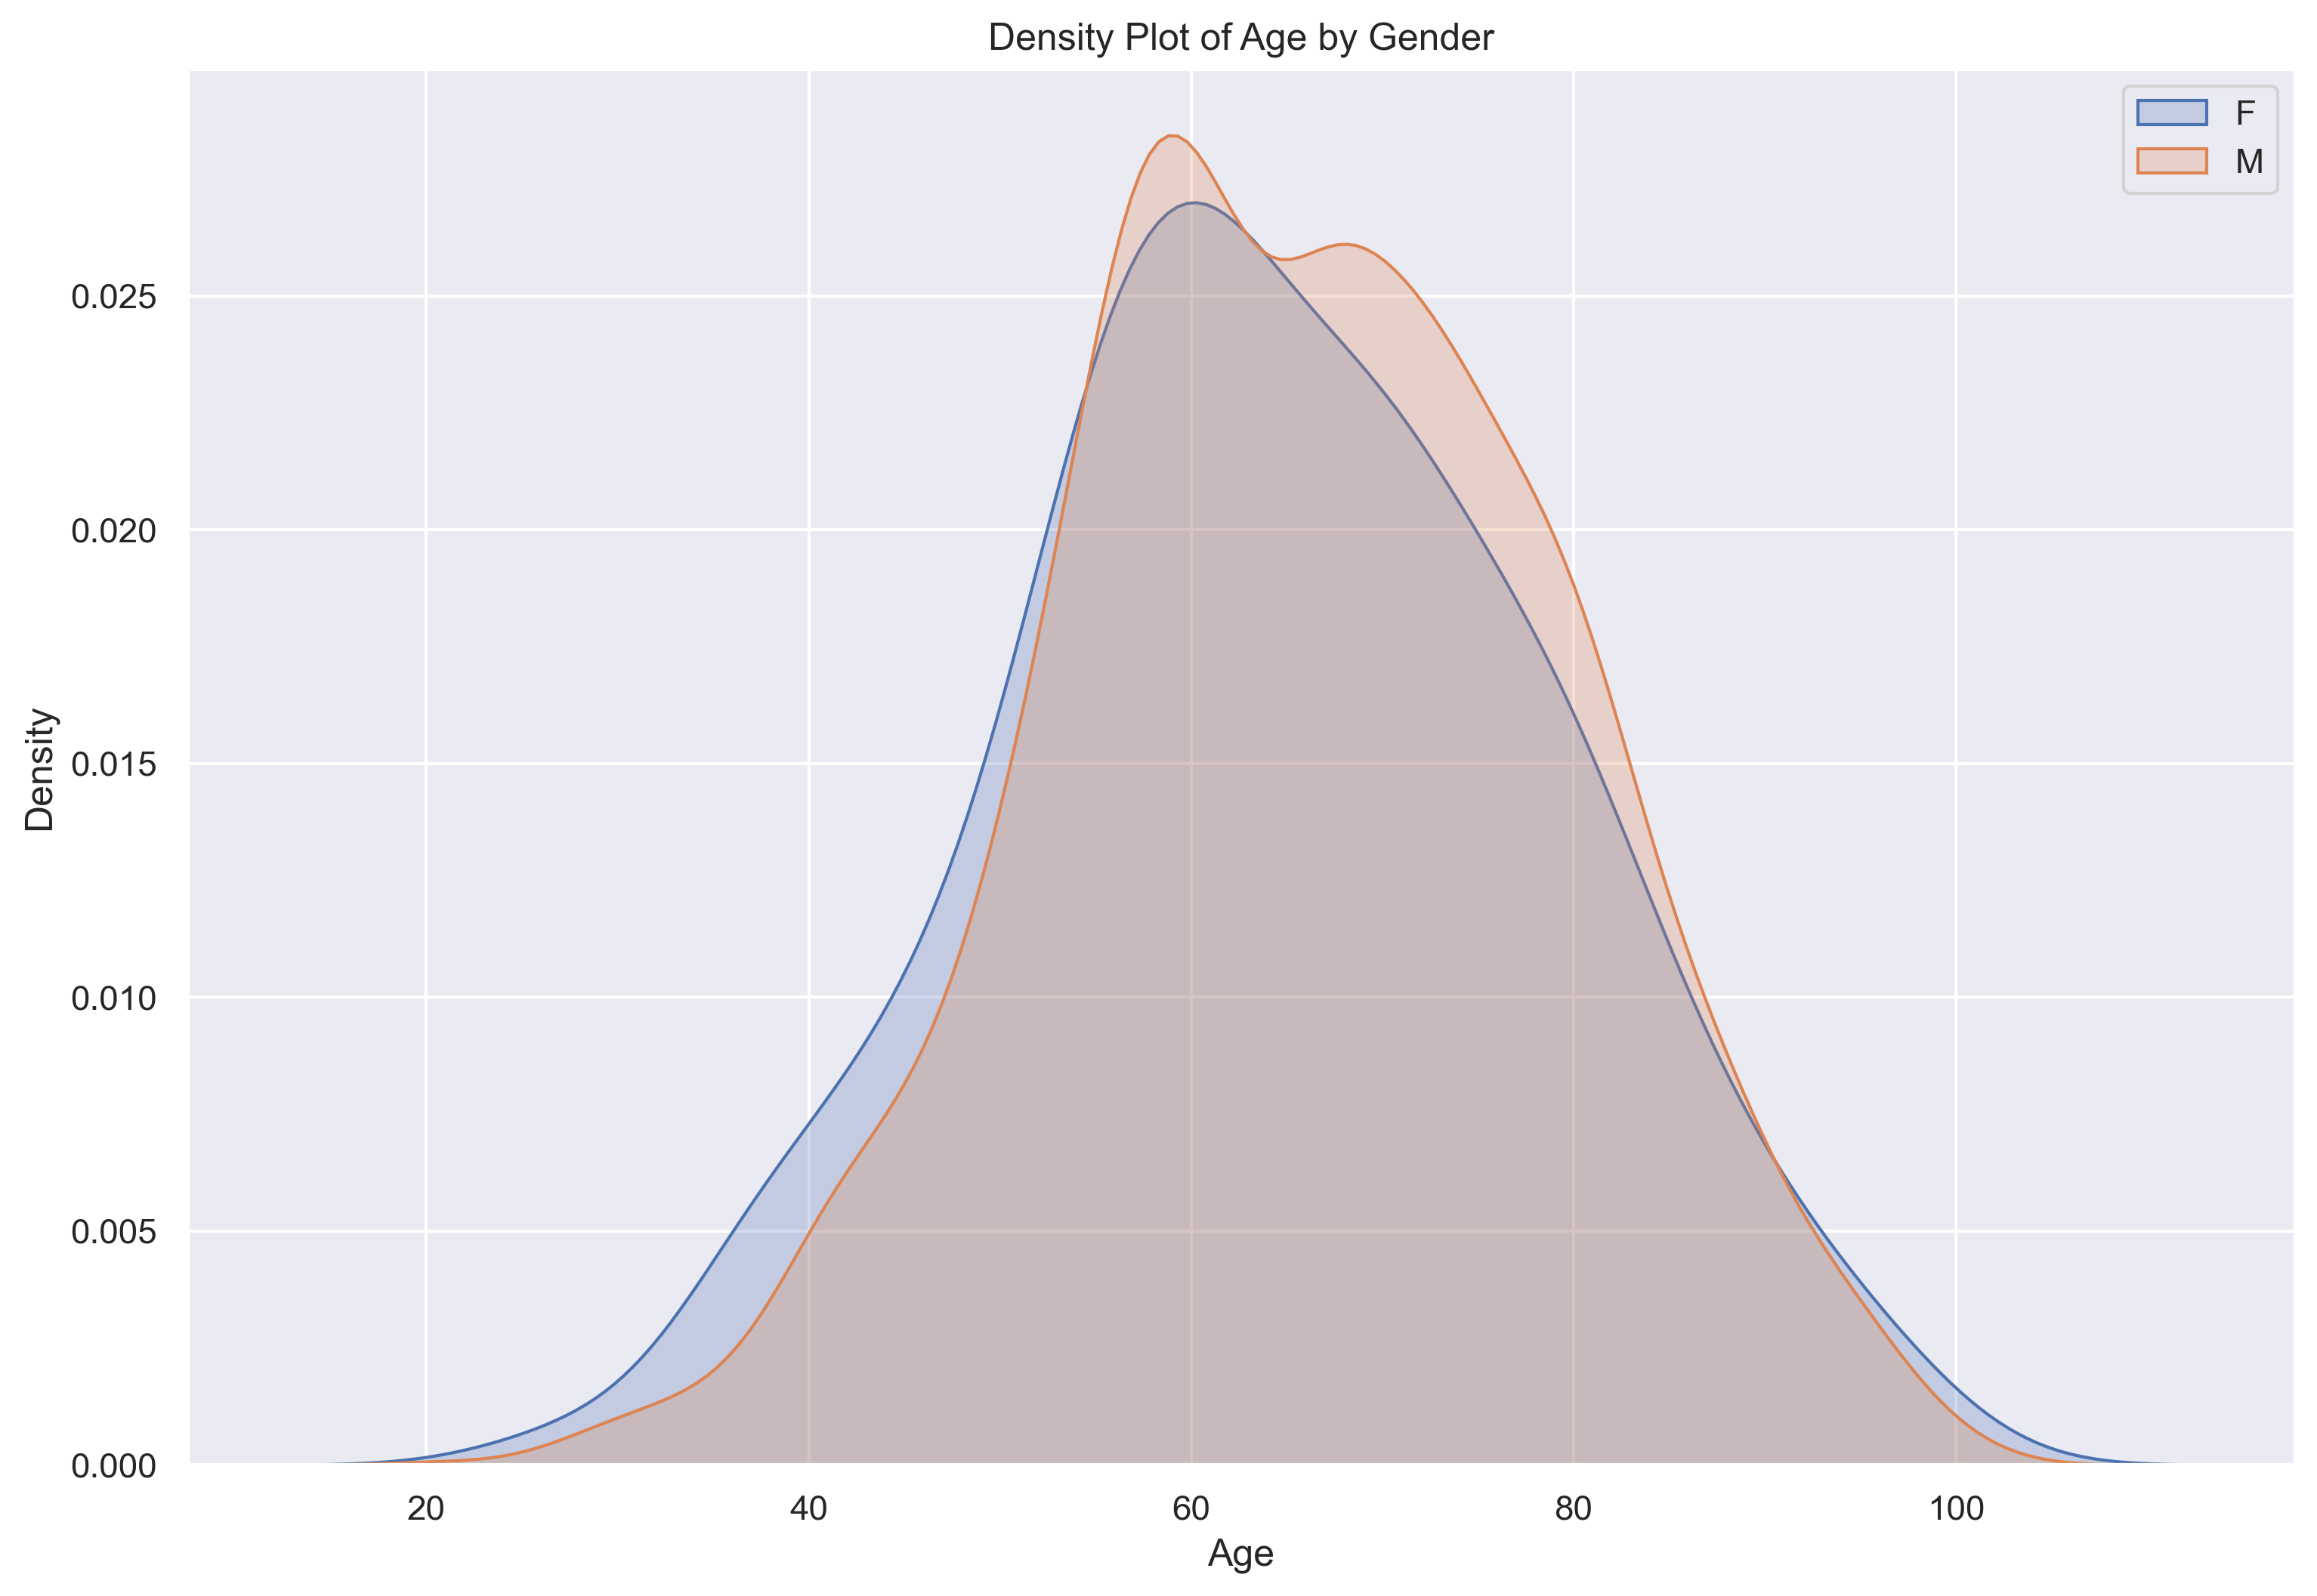

In [46]:
# Yaş bilgisini hesapla
now = datetime.datetime.now()
df['Age'] = now.year - pd.DatetimeIndex(df['birthDate']).year

# Cinsiyete göre ayrı veri setleri oluştur
male = df[df['gender'] == 'M']
female = df[df['gender'] == 'F']

# Yoğunluk grafiği
sns.kdeplot(data=female['Age'], label='F', shade=True)
sns.kdeplot(data=male['Age'], label='M', shade=True)

# Grafik özellikleri
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Density Plot of Age by Gender')
plt.legend()

plt.show()


In [48]:
# Yaş değerlerini hesaplayalım
now = datetime.datetime.now()
df["age"] = now.year - pd.DatetimeIndex(df["birthDate"]).year


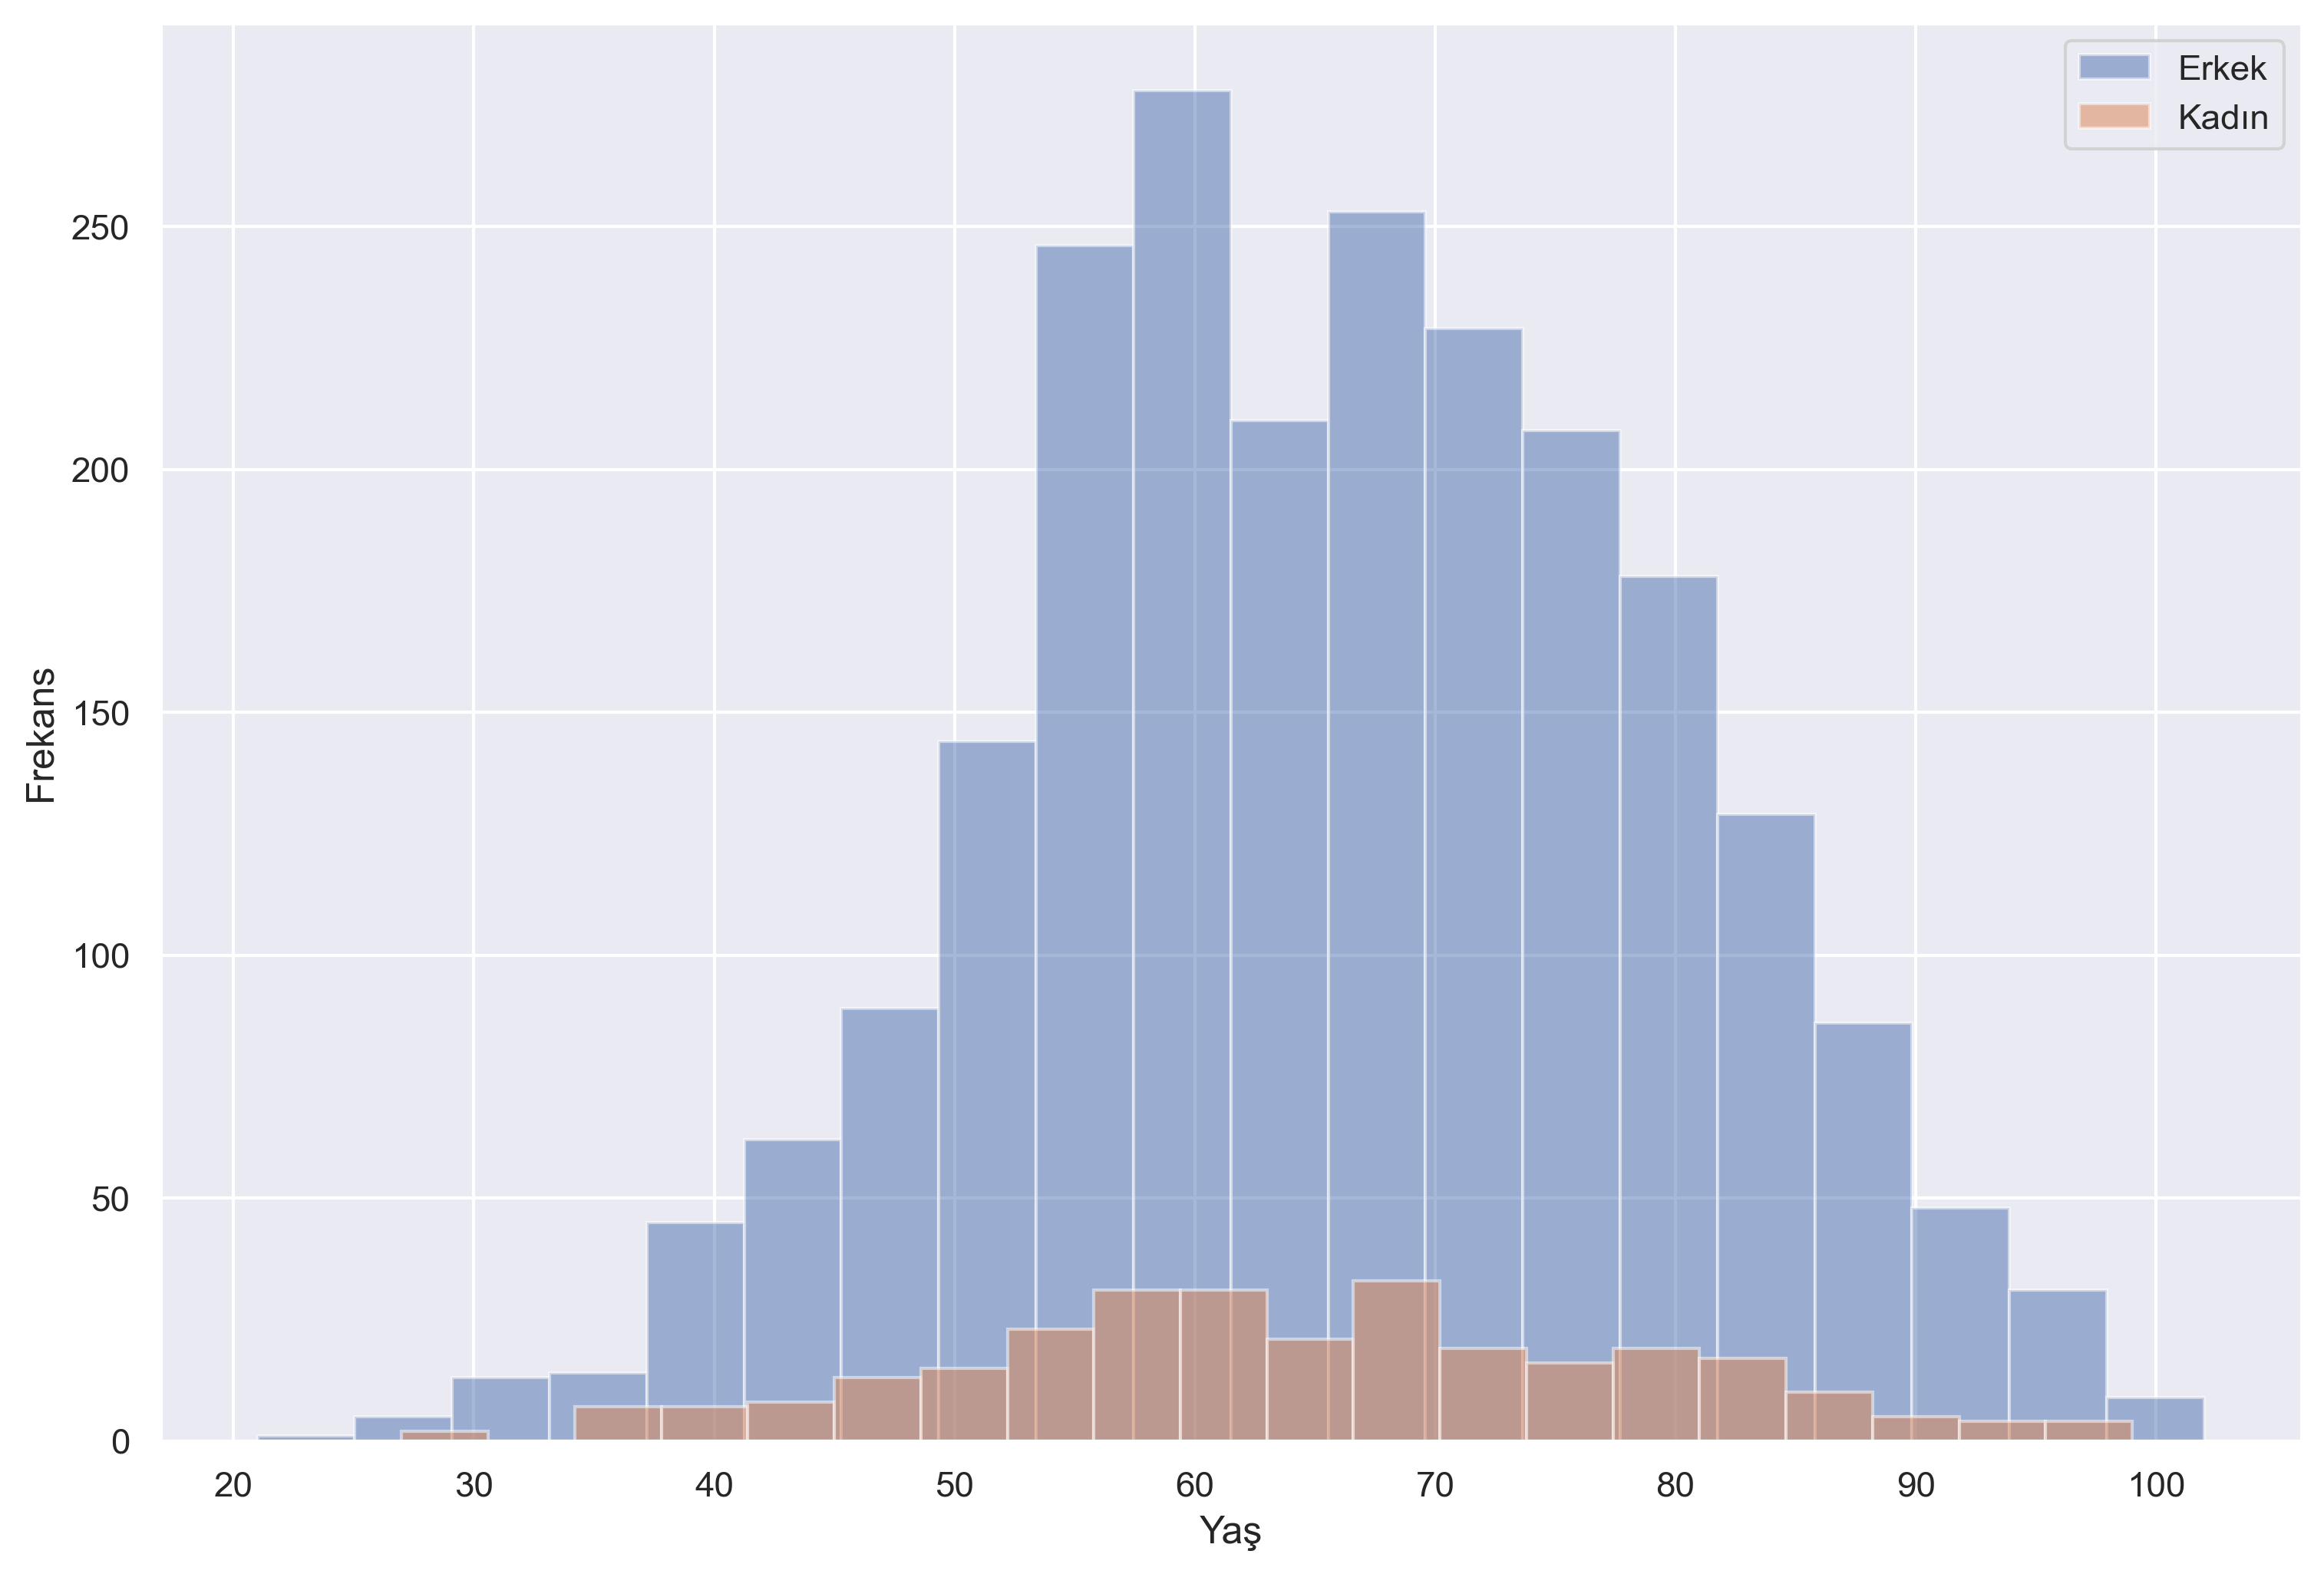

In [49]:
plt.hist(df[df["gender"]=="M"]["age"], bins=20, alpha=0.5, label="Erkek")
plt.hist(df[df["gender"]=="F"]["age"], bins=20, alpha=0.5, label="Kadın")
plt.legend(loc='upper right')
plt.xlabel('Yaş')
plt.ylabel('Frekans')
plt.show()
